# Introduction & motivations

* Background & context
> Historically, underwriters within insurance companies have worked closely with pricing actuaries to assess and manage the risks associated with providing insurance coverage to their clients, as well as to determine a suitable price/rate (known as the pure risk premium) at which an agreed level of risk coverage can be provided - as per the insurance company's risk management policy. In the past, underwriters would have needed to manually review a lot of information before they could decide what price to charge for a policy - for instance, they would need to determine:
>
> * what type of peril/s the insurance company agrees to insure,
> * what type of policy coverage can be offered, given both the insurance company's policies and the client's requirements, and
> * what level of risk is posed against the insured, and whether there is an appropriate rate that can be charged.
>
>>
> Nowadays, the underwriting process is becoming more and more automated, supported "by a combination of machine and deep learning models built within companies' technology stacks" ([McKinsey, Insurance 2030 — The impact of AI on the future of insurance](https://www.mckinsey.com/industries/financial-services/our-insights/insurance-2030-the-impact-of-ai-on-the-future-of-insurance)), which enables insurers to make rapid decisions regarding underwriting/pricing, as well as to extensively provide tailored coverage that is specific to each client's risk profile.

* What is this project about?
> The aim of the project is to provide a demonstration of how un/supervised ML techniques can be used to predict risk ratings for life insurance applicants, which could then in turn support underwriters in their decision-making process on how prospective new business should be valued. As a case study, we will use the dataset featured in the **Prudential Life Insurance Assessment** competition previously hosted on Kaggle, and showcase how ML classifiers can be used to quantitatively assess risk.
>
> More information on the dataset used can be found at the following page: [Prudential Life Insurance Assessment](https://www.kaggle.com/competitions/prudential-life-insurance-assessment/).

* What will be discussed/shown in the project?
> In this project, we will consider how to explore, pre-process and encode a dataset of life insurance applicants, how to select important risk features from the dataset, how to train/calibrate/test a range of ML classifiers to predict risk ratings based on these selected features, how to evaluate the performance of each ML classifier, and how to understand/interpret predictions generated by an ML classifier.

# Code initialisation

In [1]:
# Import key modules that will be used throughout the project.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphs/plotting
import seaborn as sns

# Check to ensure that both CSV files are held in the correct (input) directory.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/prudential-life-insurance-assessment/train.csv.zip
/kaggle/input/prudential-life-insurance-assessment/sample_submission.csv.zip
/kaggle/input/prudential-life-insurance-assessment/test.csv.zip


# Step 1: Import the datasets into dataframes

In [2]:
# Load the CSV data file into a Pandas dataframe.
main_data = pd.read_csv('../input/prudential-life-insurance-assessment/train.csv.zip')

# Review the main characteristics of the Pandas dataframe.
print(main_data.dtypes)
main_data.describe()

Id                      int64
Product_Info_1          int64
Product_Info_2         object
Product_Info_3          int64
Product_Info_4        float64
                       ...   
Medical_Keyword_45      int64
Medical_Keyword_46      int64
Medical_Keyword_47      int64
Medical_Keyword_48      int64
Response                int64
Length: 128, dtype: object


Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt  ...  Medical_Keyword_40  \
count  59381.000000  59381.000000  ...        59381.000000   
mean       0.707283      0.292587  ...            0.056954   
std        0.074239      0.089037  ...            0.231757   
min        0.000000      0.000000  ...            0.000000   
25%        0.654545      0.225941  ...            0.000000   
50%        0.709091      0.288703  ...            0.000000   
75%        0.763636      0.345188  ...            0.000000   
max        1.000000      1.000000  ...            1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

> From the cell above, we can see that there are a variety of datatypes within our dataframe - any columns with `object` dtype contain non-numerical (character) data, which will need to be pre-processed in order for these to be machine-interpretable.
>
> This will be explained in further detail later on.

In [3]:
# Set 'id' as the index column.
main_data_index_set = main_data.set_index('Id')

In [4]:
main_data_index_set.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

> Here, the `Id` has been set as the index, and each row lists out the values of each column (risk feature) for the first 5 life insurance applicants within the dataset.
> 
> Note above that there are a mixture of numeric-valued features that are both normalised and non-normalised - we will need to review and pre-process each of these columns (where required), before training/testing our models further on.

Text(0.5, 1.0, 'Response Distribution')

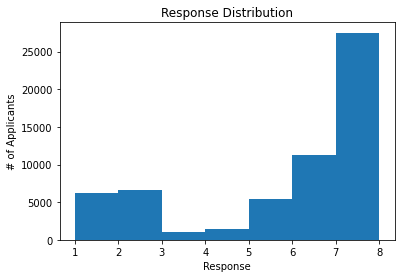

In [5]:
# Visualise the distribution of applicants' risk ratings in the full dataset.
plt.hist(main_data_index_set['Response'], bins=sorted(main_data_index_set['Response'].unique()))
plt.xlabel('Response')
plt.ylabel('# of Applicants')
plt.title('Response Distribution')

> The histogram above shows the full dataset's distribution of applicants by their determined risk ratings (i.e. `Response`).
> 
> It is important to note that the distribution is unbalanced and is skewed towards classes 6-8, although classes 1-2 also account for a notable proportion of the dataset. We will see later on as to how closely the ML models are able to 'mimic' this distribution, as an indication of whether they have been adequately fitted.

# Step 2: Perform EDA to visualise distributions/outliers/correlations/excess zeroes

### Exploratory Data Analysis (EDA)

> In this section, we will perform EDA in order to visualise and understand the dataset that we are working on. This is essential in order to understand how our models will need to be trained/evaluated/understood, later on.
>
> The cell below contains separate lists that pertain to each of the sets of variables within the dataset. For instance, `ColSet1_ProdInfo` refers to the set of columns that are prefixed by "**Product_Info_**".

In [6]:
# Split out the full set of the main dataset's columns into separate lists for easier use.

ColSet1_ProdInfo = ['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']
ColSet2_ApplicantInfo = ['Ins_Age','Ht','Wt','BMI']
ColSet3_EmploymentInfo = ['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']
ColSet4_InsuredInfo = ['InsuredInfo_1','InsuredInfo_2','InsuredInfo_3','InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7']
ColSet5_InsuranceHistoryInfo = ['Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4','Insurance_History_5','Insurance_History_7','Insurance_History_8','Insurance_History_9']
ColSet6_FamilyHistoryInfo = ['Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']

ColSet7_MedicalHistoryInfo = ['Medical_History_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5','Medical_History_6','Medical_History_7','Medical_History_8',
                              'Medical_History_9','Medical_History_10','Medical_History_11','Medical_History_12','Medical_History_13','Medical_History_14','Medical_History_15',
                              'Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19','Medical_History_20','Medical_History_21','Medical_History_22',
                              'Medical_History_23','Medical_History_24','Medical_History_25','Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29',
                              'Medical_History_30','Medical_History_31','Medical_History_32','Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36',
                              'Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41']

ColSet8_MedicalKeywordInfo = ['Medical_Keyword_1','Medical_Keyword_2','Medical_Keyword_3','Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6','Medical_Keyword_7','Medical_Keyword_8',
                              'Medical_Keyword_9','Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12','Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15','Medical_Keyword_16',
                              'Medical_Keyword_17','Medical_Keyword_18','Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21','Medical_Keyword_22','Medical_Keyword_23','Medical_Keyword_24',
                              'Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27','Medical_Keyword_28','Medical_Keyword_29','Medical_Keyword_30','Medical_Keyword_31','Medical_Keyword_32',
                              'Medical_Keyword_33','Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36','Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39','Medical_Keyword_40',
                              'Medical_Keyword_41','Medical_Keyword_42','Medical_Keyword_43','Medical_Keyword_44','Medical_Keyword_45','Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']

### Distribution plots
> Here, we will generate Kernel Density Estimate (KDE) plots for each of the features - where `Response` is set as the hue of each curve - in order to compare the distributions across each risk rating, and to understand whether there are any trends/correlations within the data.
> 
> To do this, we will use the `seaborn.kdeplot()` function as a high-level interface to plot these pairwise relationships in the `main_data_index_set` dataset.

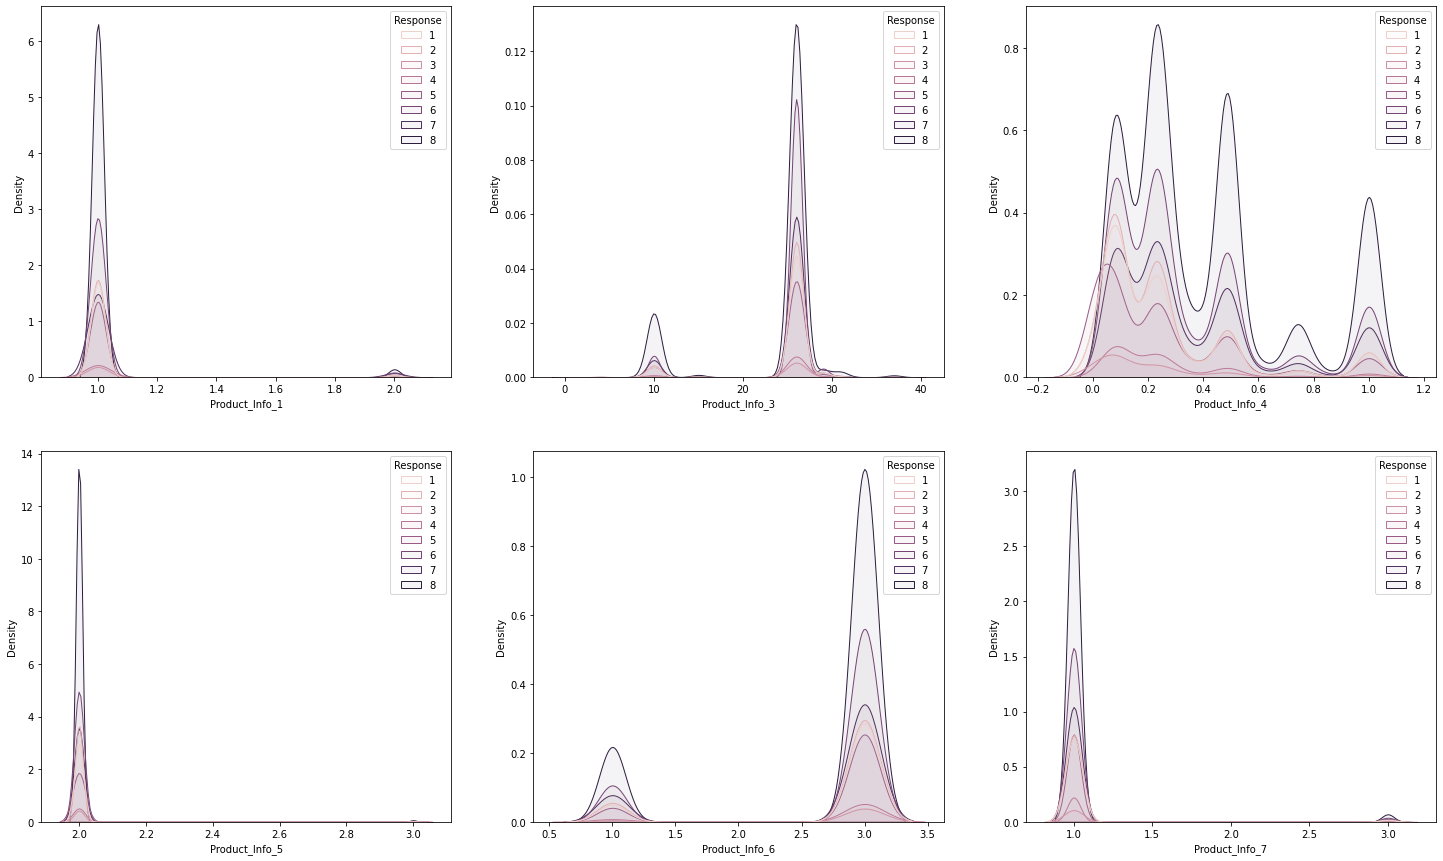

In [7]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Product_Info_2 has been excluded - as this has not yet been encoded into numeric values.
ColSet1_ProdInfo_kde = ['Product_Info_1','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet1_ProdInfo_kde].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

> These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each `Response` group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

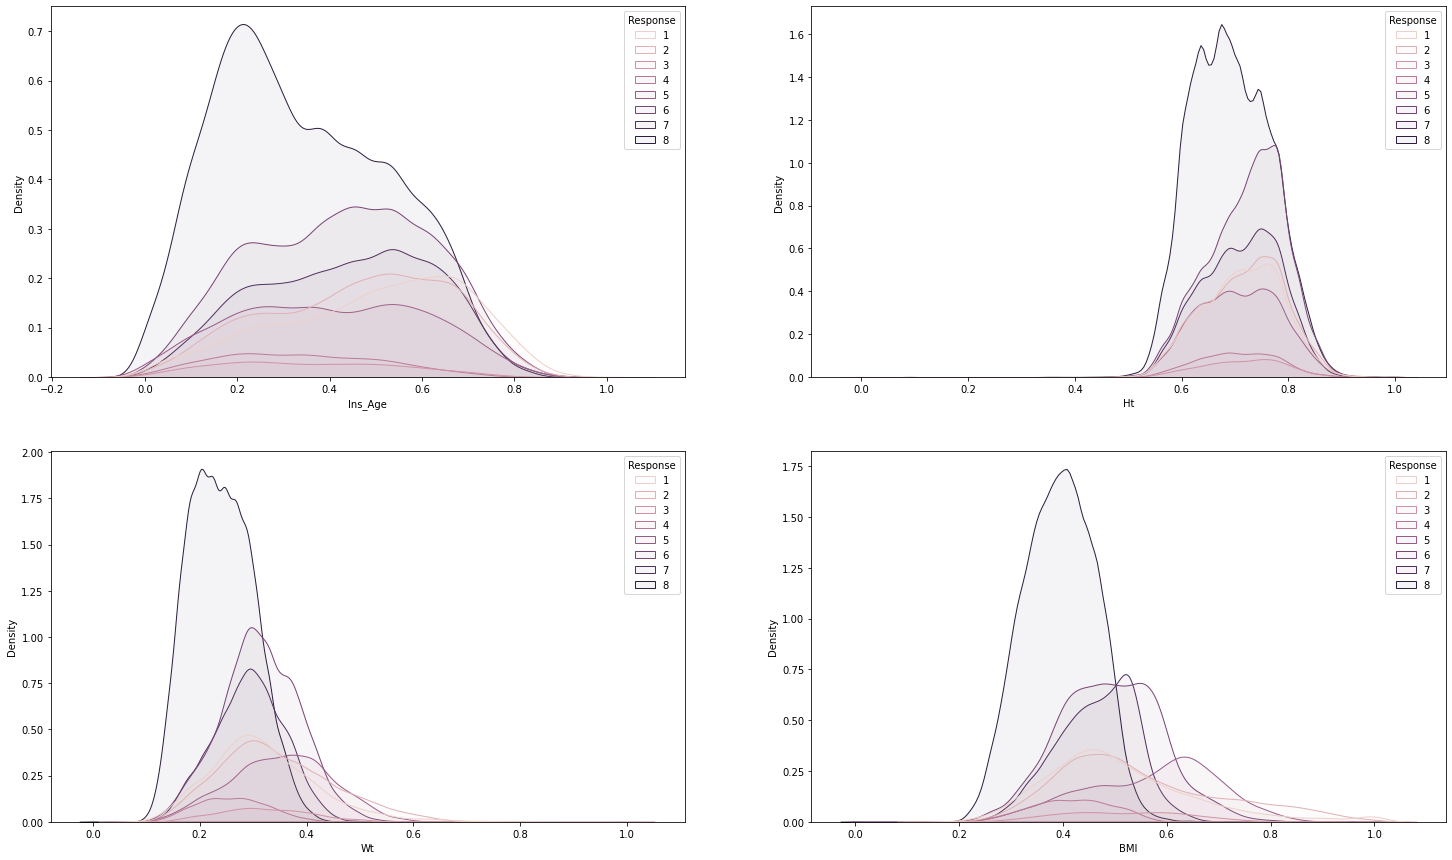

In [8]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet2_ApplicantInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//2,i%2])

* **Ins_Age**: This KDE plot displays significant variation in each `Response` group distribution's composition and structure, where each peak exhibits both broadening and shouldering. Whilst the majority of the distribution density is spread between x=0 and x=0.9, each cohort's distribution does vary somewhat in shape and skew - for instance, class 8 features positive skew towards x=0.2 whereas most of the other classes are negatively skewed towards x=0.4.
* **Ht**: This KDE plot displays significant variation in each `Response` group distribution's composition and structure, where each peak exhibits both broadening and shouldering. The majority of the distribution density is spread between x=0.6 and x=0.8, and each cohort's skew is similar to that shown in `Ins_Age` (i.e. positive for class 8, negative for most others).
* **Wt**: This KDE plot displays significant variation in each `Response` group distribution's composition and structure, where each peak exhibits both broadening and shouldering. The majority of the distribution density is spread between x=0.2 and x=0.5. The distribution for class 8 is notably centred around low values of `Wt` (x=0.2), whereas the remainder of the population is mostly spread across the interval between x=0.2 and x=0.5.
* **BMI**: This KDE plot displays significant variation in each `Response` group distribution's composition and structure, where each peak exhibits both broadening and shouldering. The majority of the distribution density is spread in a similar fashion to `Wt` - class 8's peak is centred at x=0.4 whereas most of the other classes' distributions are spread across the interval between x=0.4 and x=0.6. However, one of the "medium" risk-rating distributions features a notably stronger skew in its distribution compared to its peers, with significant negative skew towards x=0.6 rather than towards x=0.5.

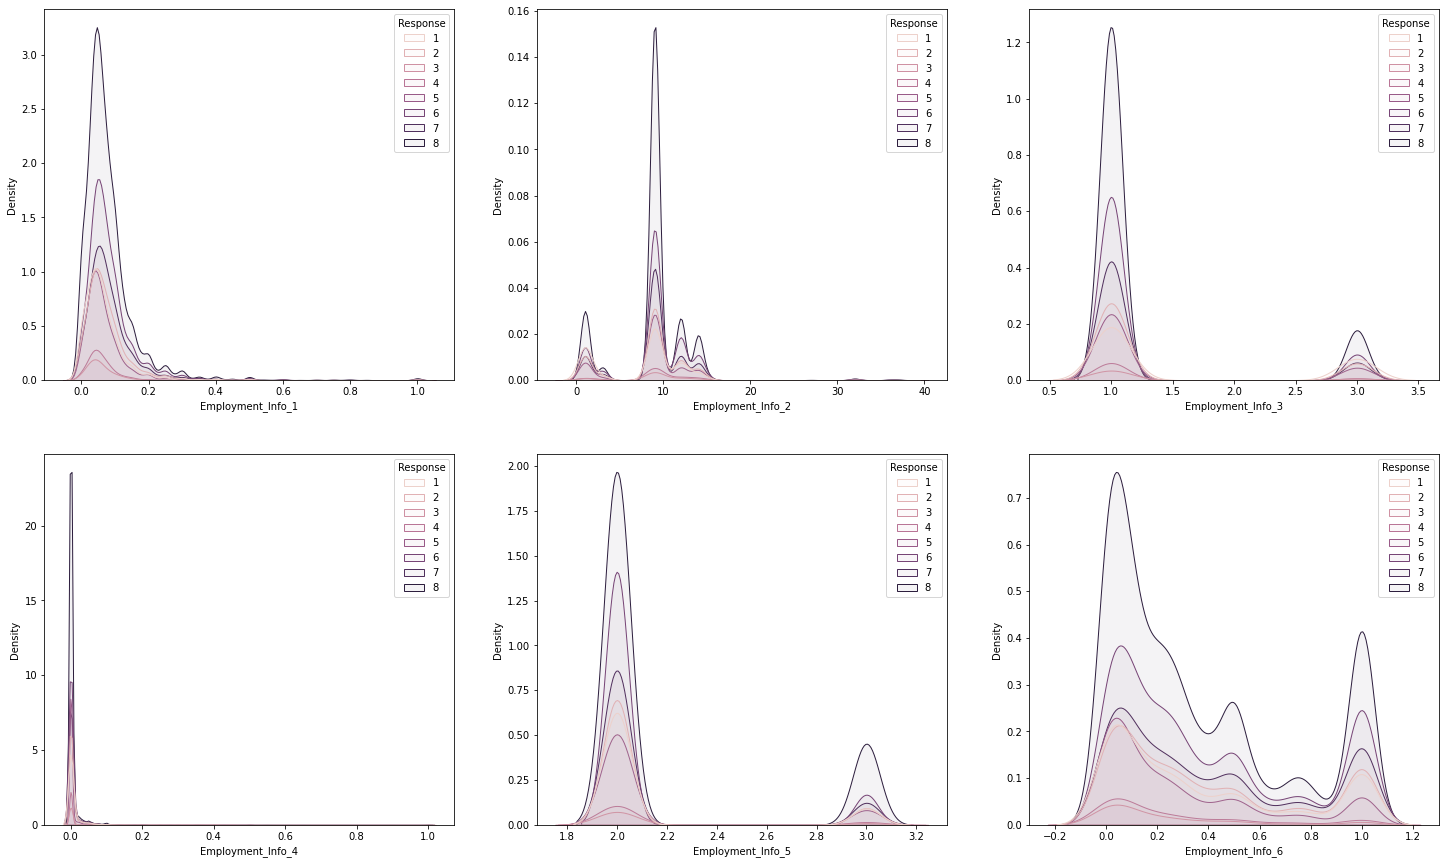

In [9]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet3_EmploymentInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

> These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each `Response` group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

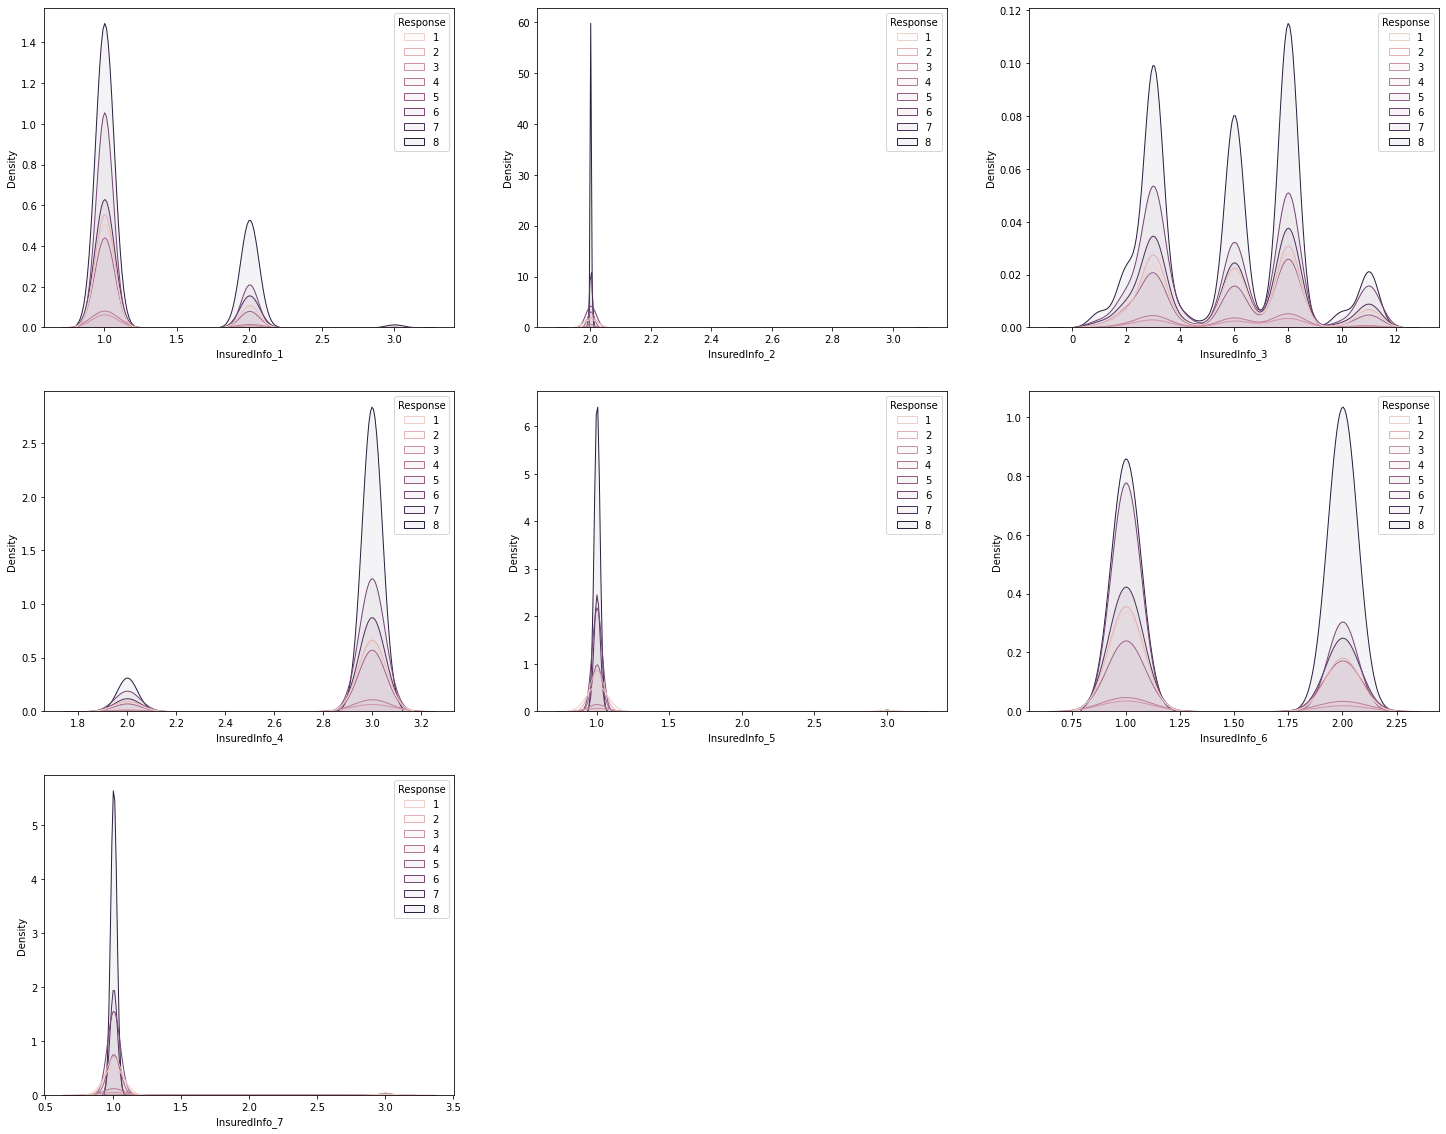

In [10]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet4_InsuredInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

> These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each `Response` group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

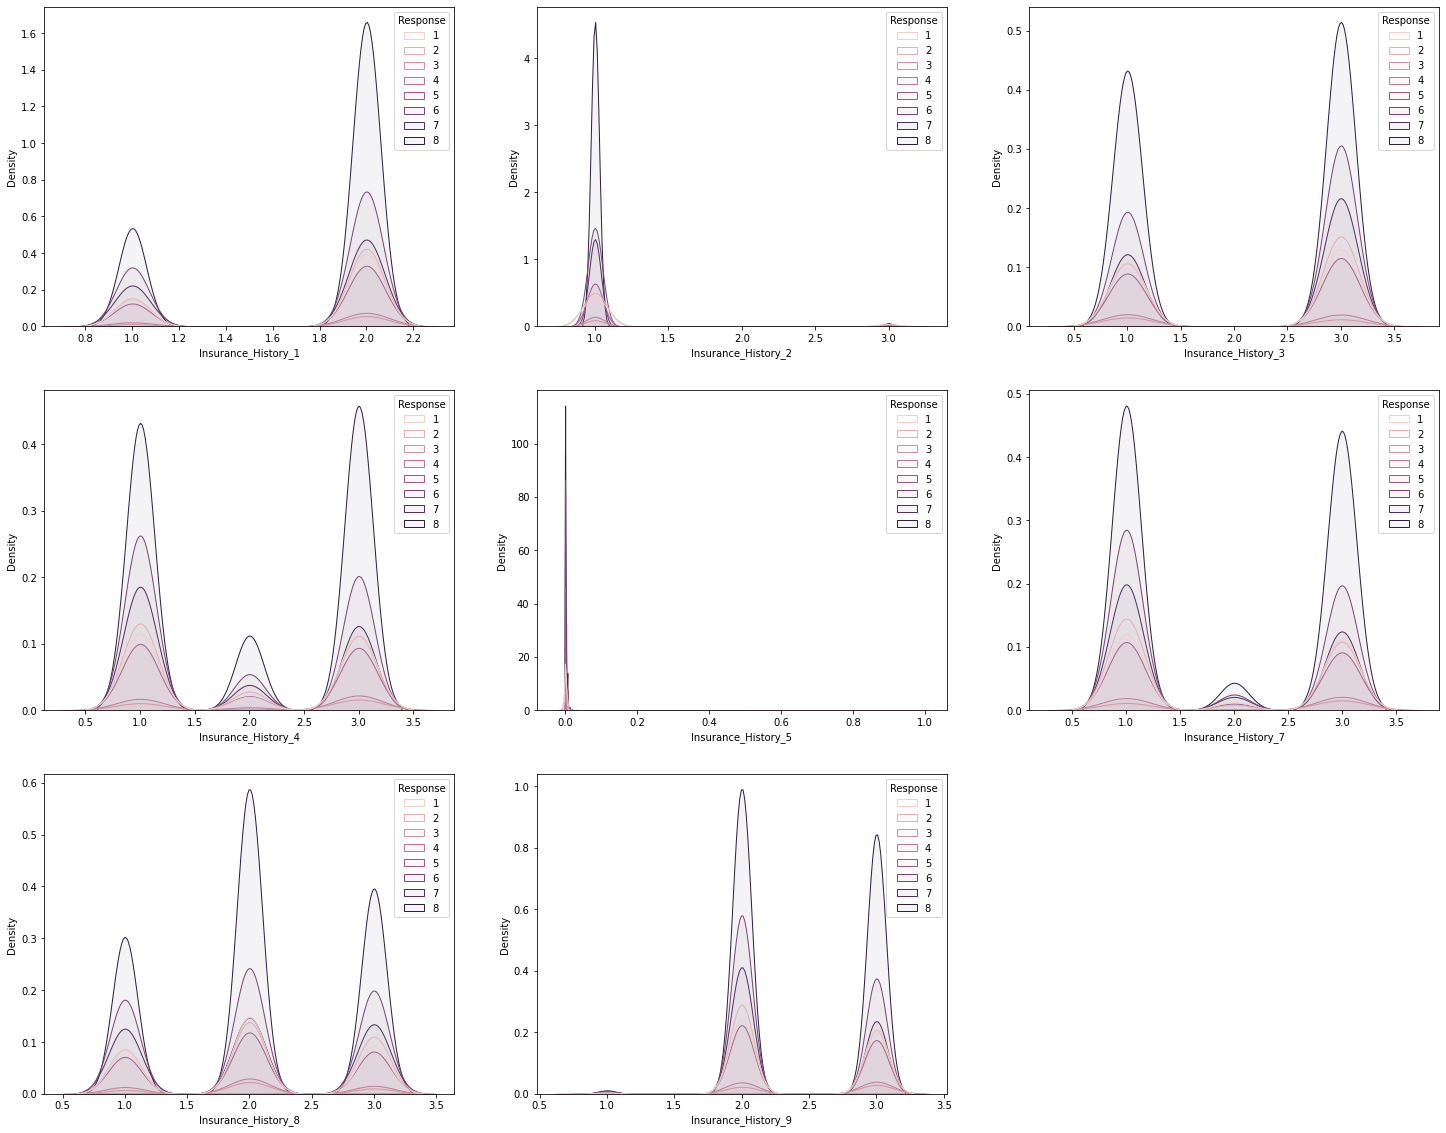

In [11]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet5_InsuranceHistoryInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])
    
# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[2,2])

> These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each `Response` group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

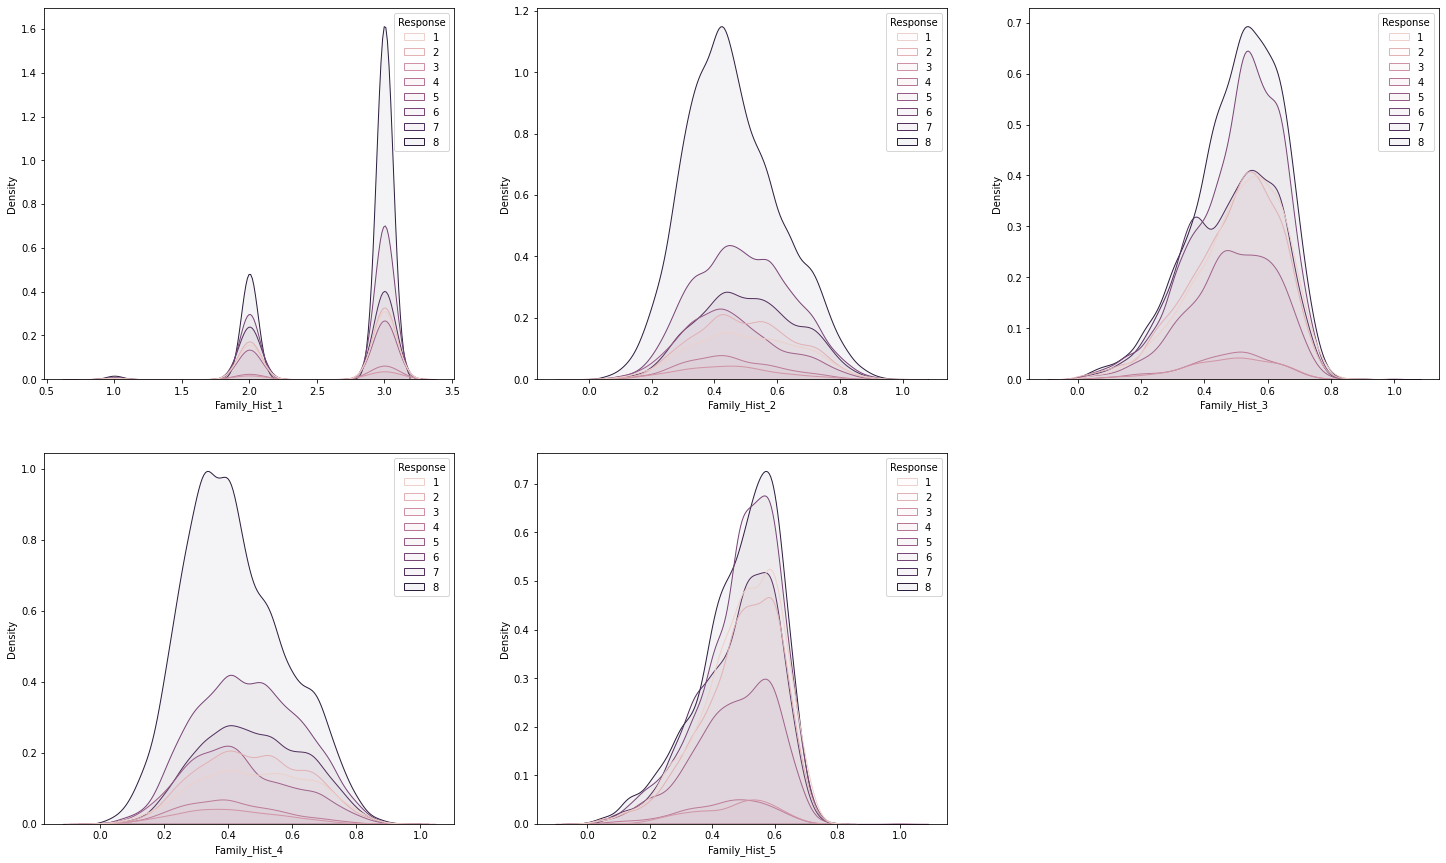

In [12]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet6_FamilyHistoryInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[1,2])

> * **Family_Hist_1:** This KDE plot shows a bimodal distribution comprised of two peaks at x=2 and x=3 (along with a very low-density curve at x=1), with the most prominent peak at x=3. However, as this feature appears to show little variation in relative densities between each of the `Response` classes, any variation in this feature is unlikely to individually help towards predicting an applicant's risk rating.
> 
> * **Family_Hist_2 - Family_Hist_5**: These KDE plots show a number of unimodal distributions which display some variation in terms of each `Response` group distribution's composition and structure, where each peak exhibits both broadening and shouldering. Whilst the majority of the distributions' densities are spread between x=0.2 and x=0.8, each cohort's distribution does vary somewhat in shape and skew/kurtosis - for instance, class 8 generally features more positive kurtosis than most of the other classes' distributions, which tend to show broader density plots.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


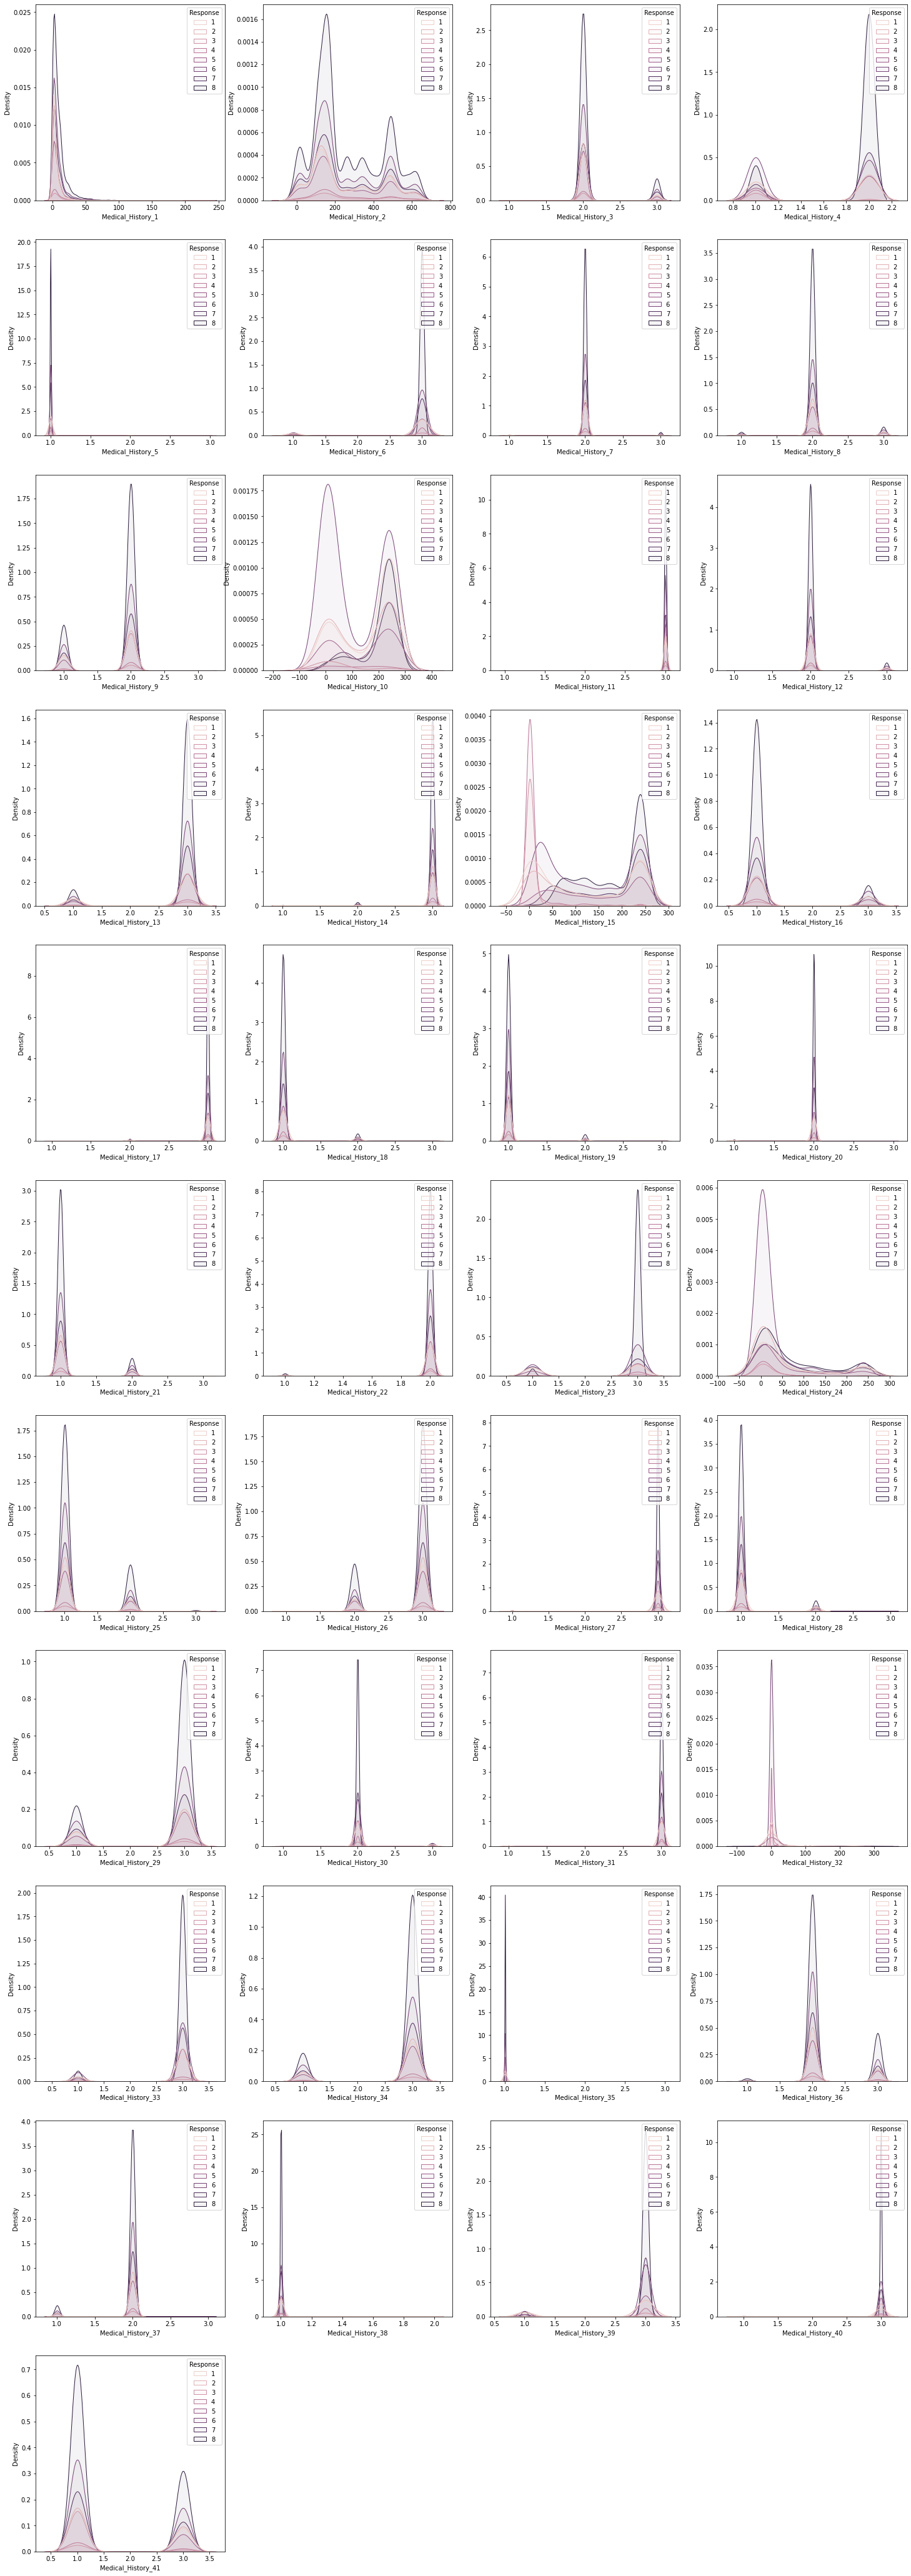

In [13]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(25,75))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet7_MedicalHistoryInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//4,i%4])

# Delete any unused sets of axes in the subplot grid.    
fig.delaxes(axes[10,1])
fig.delaxes(axes[10,2])
fig.delaxes(axes[10,3])

A majority of these KDE plots feature distributions that closely overlap between each `Response` group/cohort of applicants, and hence any variation in the underlying features is unlikely to individually lend any predictive power for determining an applicant's risk rating. However, there are a handful of notable exceptions:

* **Medical_History_2/15/24**: These KDE plots appears to show multimodal distributions that features some degree of predictive distinction in terms of variance, as each Response group distribution's peaks exhibit different levels of broadening and shouldering. However, it is important to note the scales of the y-axes here - the densities for each underlying distribution are very small and provide little in the way of allowing each feature to individually help in distinguishing between each Response group.
* **Medical_History_10**: This KDE plot seems to display some interesting features. For the low-risk applicant cohorts, the plots appear to show distributions that are bimodal, however at higher risk levels the distribution tends towards having a single peak instead. Unfortunately, as will be shown in further detail later on, this column features a very high proportion of missing values and thus its distribution/s should not be misconstrued as highly predictive.
* **Medical_History_23**: This KDE plot helps to illustrate that this feature *does* show some potential. As the `Response` value/risk rating increases, each peak in the bimodal distribution becomes sharper as the degree of kurtosis becomes more positive. In simpler terms, having a value (within this column) that is further away from the peaks' centres would tend to correlate with having a lower risk rating, whereas values that overlap closely with the peaks tend to represent applicants with higher risk ratings.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


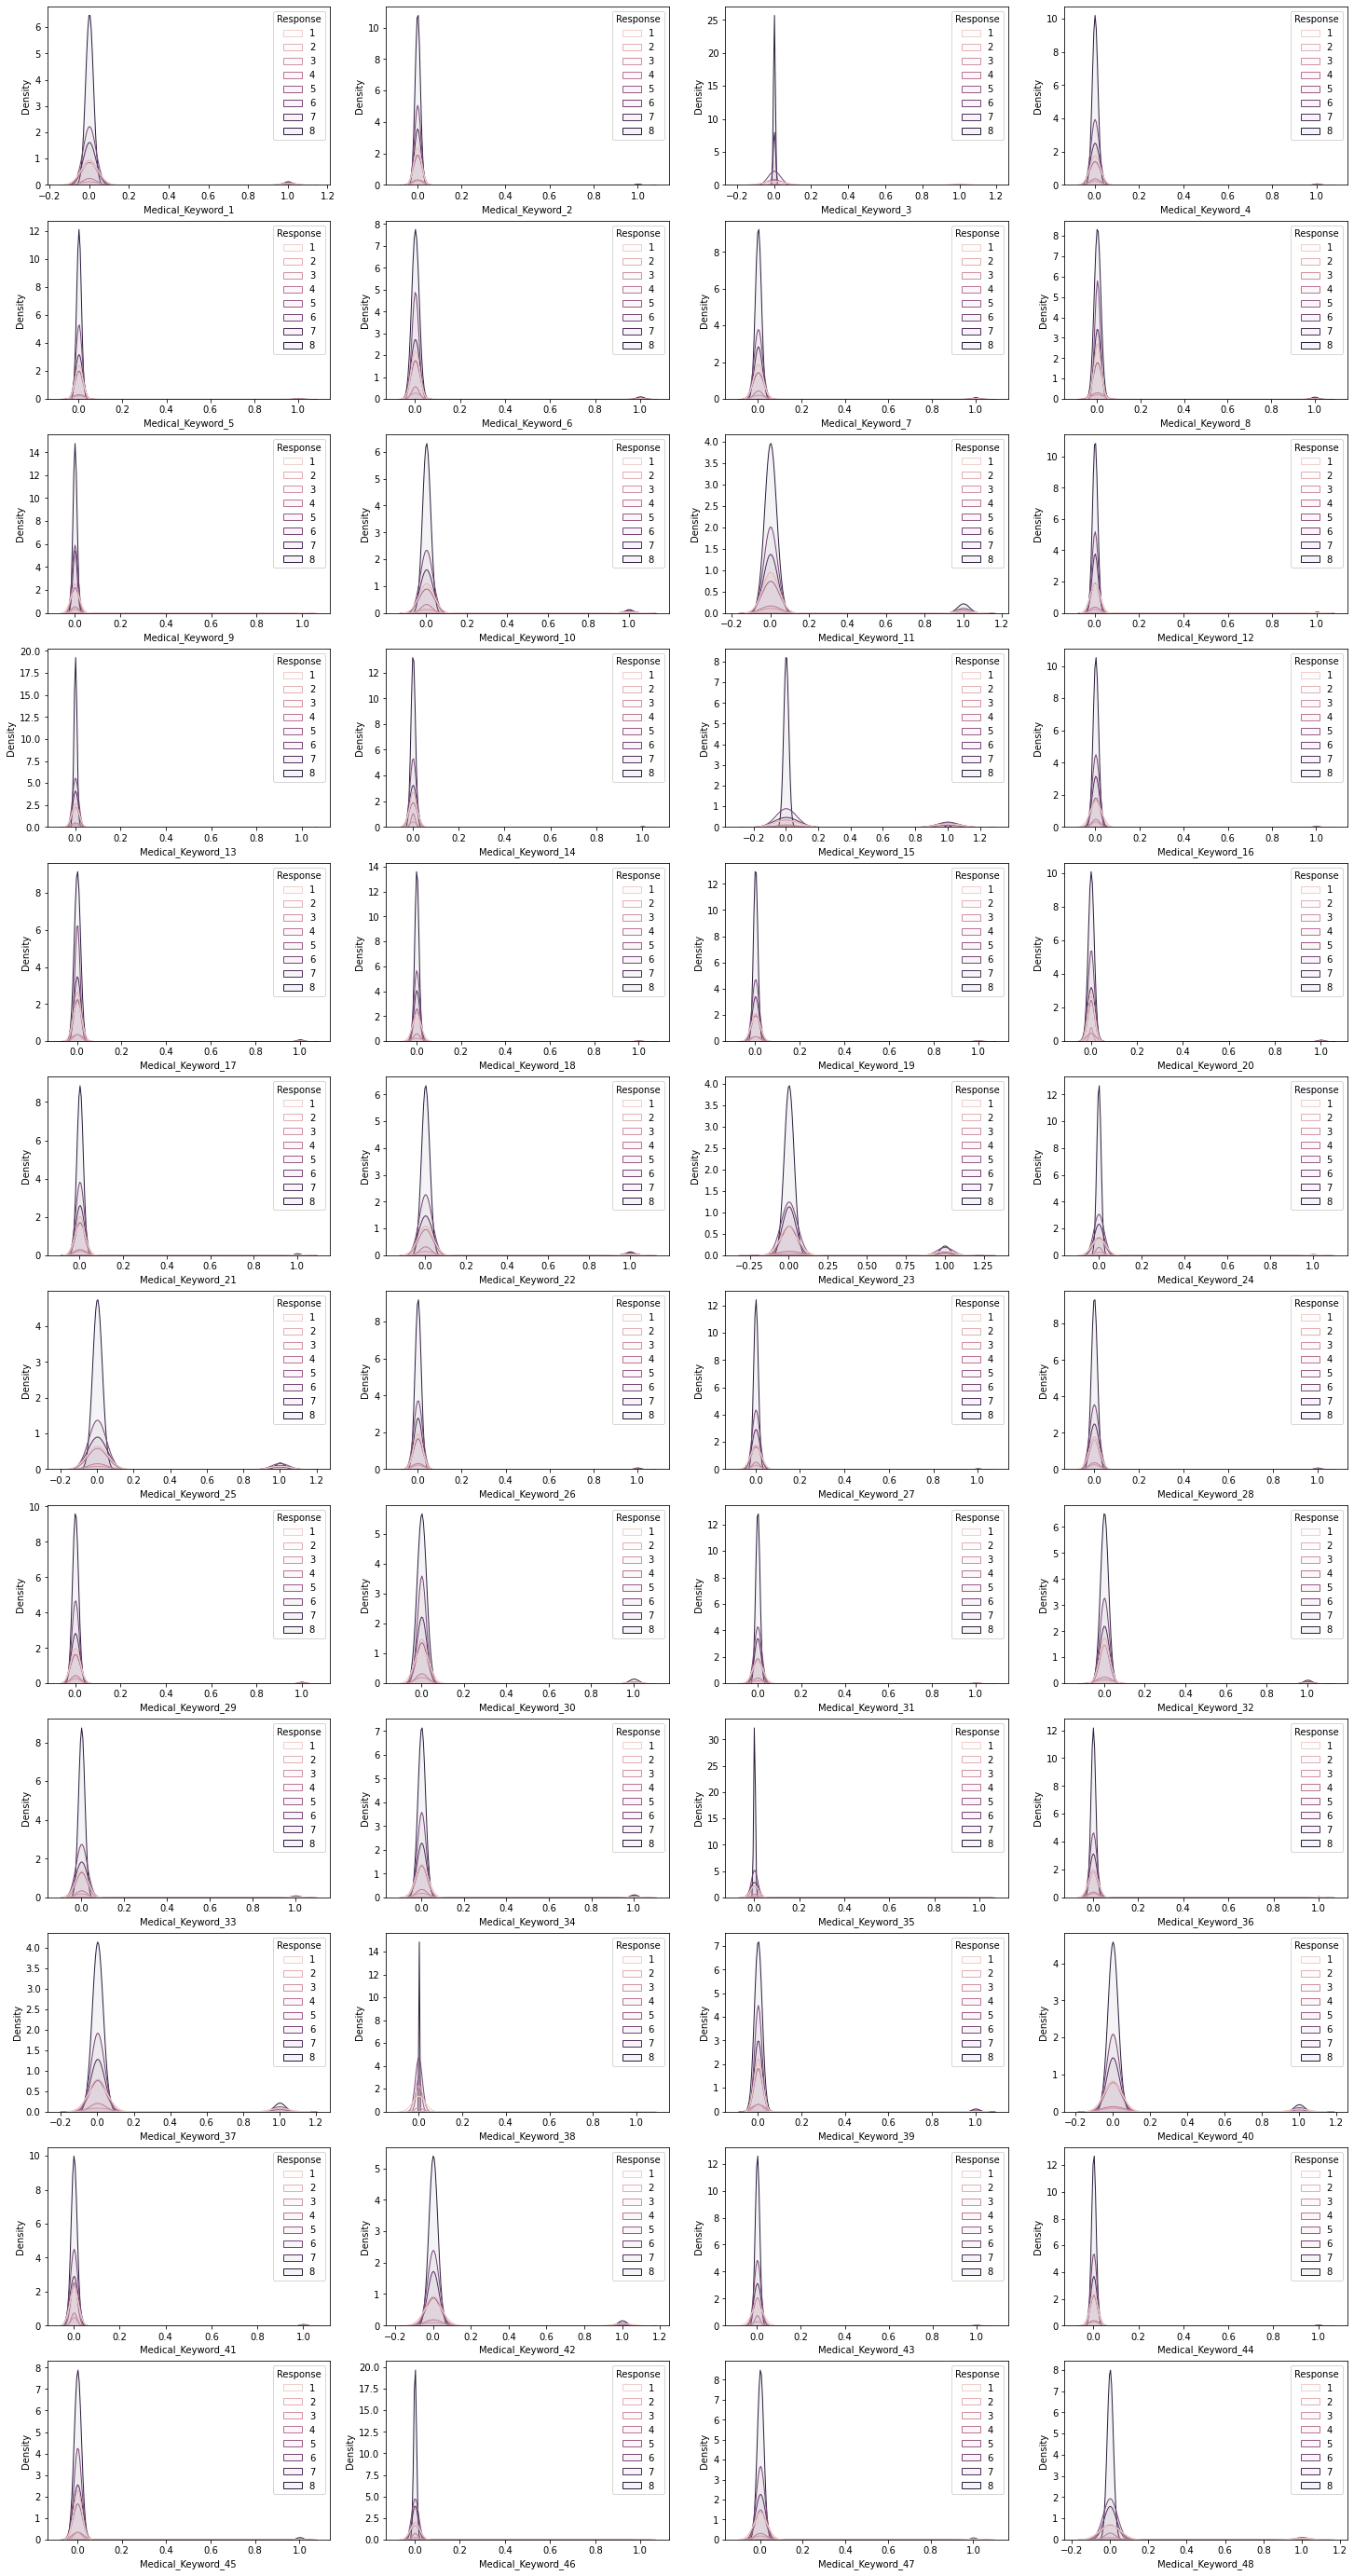

In [14]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(25,50))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(main_data_index_set[ColSet8_MedicalKeywordInfo].columns):
    sns.kdeplot(data=main_data_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//4,i%4])

> These KDE plots show a number of distributions with varying modality, however the consistent trend to them is that they all closely overlap between each `Response` group/cohort of applicants, with no major difference in relative densities. As a result, any variation in these features is unlikely to individually help towards predicting an applicant's risk rating.

### Correlation plots/heatmaps

> Next, we will generate a correlation heatmap plot for all of the features - in order to better understand the correlations between each pair of features, and help to uncover whether there are any possible interactions within the data.
> 
> To do this, we will use the `seaborn.heatmap()` function as a high-level interface to plot these pairwise relationships in the `main_data_index_set` dataset.

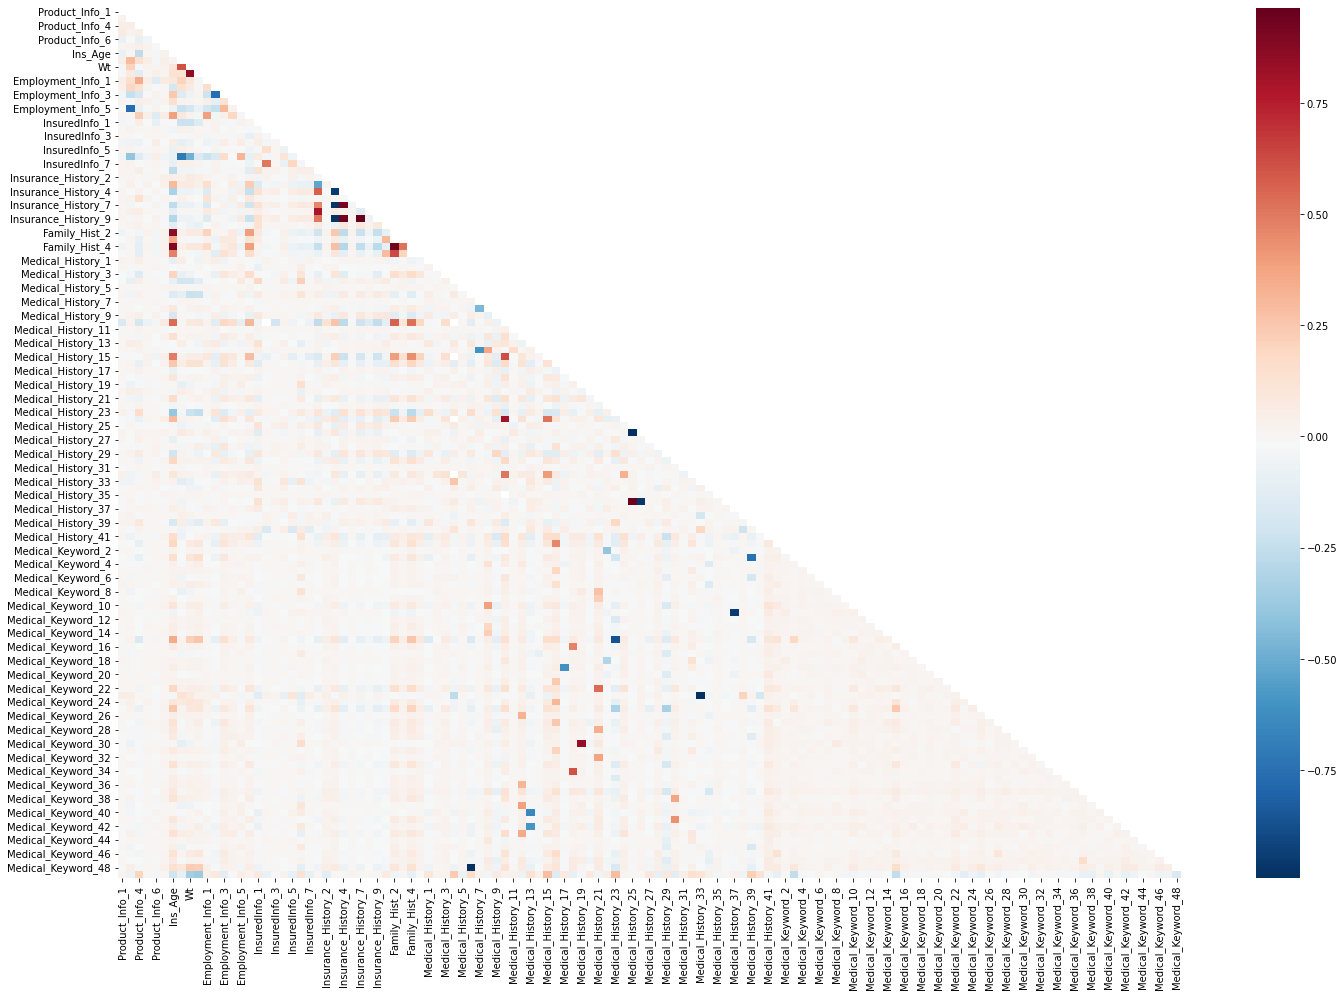

In [15]:
# Produce a correlation matrix of the dataset - then, create a mask to hide the upper-right half of the matrix.
corrs = main_data_index_set.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convert the correlation matrix into a heatmap using Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

From the chart above, we can infer (based on each column set):

* **Column Set 1 - Product Info:** These appear to show little interaction/correlation with a majority of the other feature sets, with the exception of `Employment_Info_1`, `Employment_Info_5` and `Insured_Info_6` - these columns may be directly correlated as, to give an example, an applicant's employment/financial status will have an impact on what type of policy/product the applicant is applying for.
* **Column Set 2 - Applicant Info:** These columns show a varying range of interactions with the other feature sets; the strongest anti-/correlations (excluding those within the same column set) are between a handful of the `Family_Hist` columns as well as `Insured_Info_6`.
* **Column Set 3 - Employment Info:** With the exception of two strong anti-correlations - between `Employment_Info_2` and `Employment_Info_3`, plus between `Employment_Info_5` and `Product_Info_3` - and a couple of moderate interactions between `Employment_Info_6` and `Family_Hist_2` / `Family_Hist_4`, this column set does not interact very strongly with the rest of the features.
* **Column Set 4 - Insured Info:** The column `InsuredInfo_2` shows a fairly strong correlation with `InsuredInfo_7`, and also a strong anticorrelation with some of the Applicant Info columns; otherwise, this column set does not interact very much with the rest of the other features.
* **Column Set 5 - Insurance History Info:** This feature set exhibits several strong inter-correlations with other `Insurance_History` columns, but does not interact very much with the rest of the features.
* **Column Set 6 - Family History Info:** The columns `Family_Hist_2` and `Family_Hist_4` show a very strong positive correlation with `Ins_Age`, and also with `Medical_History_10` and `Medical_History_15` to a lesser degree.
* **Column Set 7 - Medical History Info:** This column set shows a number of correlation hotspots against several `Medical_Keyword` columns, as well as against `Ins_Age` and some of the `Family_Hist` columns.
* **Column Set 8 - Medical Keyword Info:** These columns show a number of correlation hotspots against several `Medical_History` columns, but do not otherwise show any notable interactions with the rest of the features.

### Missing values/excess zeroes

> It is important to review the completeness of our dataset, in order to make sure that any correlations/trends can be substantiated with sufficient evidence - in other words, that there are enough data-points to validate any inferences/predictions that we may make from the dataset.
> 
> For demonstration purposes, the following checks below are aimed at displaying where the entire dataset is incomplete.

In [16]:
# Determine which columns contain nulls/missing values.
cols_with_missing = [col for col in main_data_index_set.columns
                     if main_data_index_set[col].isnull().any()]

# Summarise how many missing values are present in each column.
main_data_index_set[cols_with_missing].isna().sum()

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [17]:
## Calculate the proportion of zeroes relative to non-zero values.
for col in cols_with_missing:
    sum = main_data_index_set[col].isna().sum()
    length = len(main_data_index_set[col].index)
    ratio = sum/length
    print('Proportion of zeroes in', col, 'is: ', round(ratio*100,2), '%.')

Proportion of zeroes in Employment_Info_1 is:  0.03 %.
Proportion of zeroes in Employment_Info_4 is:  11.42 %.
Proportion of zeroes in Employment_Info_6 is:  18.28 %.
Proportion of zeroes in Insurance_History_5 is:  42.77 %.
Proportion of zeroes in Family_Hist_2 is:  48.26 %.
Proportion of zeroes in Family_Hist_3 is:  57.66 %.
Proportion of zeroes in Family_Hist_4 is:  32.31 %.
Proportion of zeroes in Family_Hist_5 is:  70.41 %.
Proportion of zeroes in Medical_History_1 is:  14.97 %.
Proportion of zeroes in Medical_History_10 is:  99.06 %.
Proportion of zeroes in Medical_History_15 is:  75.1 %.
Proportion of zeroes in Medical_History_24 is:  93.6 %.
Proportion of zeroes in Medical_History_32 is:  98.14 %.


> In the code above, we have checked through the entire dataset to determine how many columns contain missing values, and how many missing values there are in each of these columns.
> 
> However, as we wish to avoid test-data leakage later on during our model validation/testing process, we need to ensure that we are only using a "training" set of data in order to inform our view of the completeness of our data. Hence, we will need to split the full dataset into training/validation/testing sets *and then* review the training set for missing values afterwards.

# Step 3: Perform a train-validation-test split of the dataset

> Here, we will create separate dataframes that will store the features and target variables.
>
> These are then supplied to the `sklearn` function `train_test_split()` in order to split the data into training/validation/test subsets.

In [18]:
# Assign the features to their own dataframe.
X_full = main_data_index_set.drop(['Response'], axis=1)

# Assign the target variable to its own dataframe.
y_full = main_data_index_set.Response

# Perform a train-test split to obtain the training, validation and test data as separate dataframes.
from sklearn.model_selection import train_test_split

# Split out test/holdout set from full dataset.
# We will set the size of the X/y test datasets to be 20% of the original (full) X/y datasets, via the train_size/test_size parameters.
X_rem, X_test, y_rem, y_test = train_test_split(X_full, y_full, train_size=0.8, test_size=0.2, random_state=0, stratify=y_full)

# Split remaining portion into training/validation sets.
# We will set the size of the X/y train datasets to be 60% of the original (full) X/y datasets, via the train_size/test_size parameters.
X_train, X_valid, y_train, y_valid = train_test_split(X_rem, y_rem, train_size=0.75, test_size=0.25, random_state=0, stratify=y_rem)

# Step 4: Review the training dataset's columns and handle them accordingly

### Locating/handling excess zeroes
> As detailed above, we will now review the training subset in order to understand where there are missing values.
>
> Statistical tests can be performed to assess whether values in these columns are either missing completely at random (MCAR), missing at random (MAR) or missing not at random (MNAR) - this will indicate whether or not our remaining data is likely to still be representative of the general population. In the interest of brevity, we assume here that any missing data are MCAR and that any subsequent analysis/imputation is not subject to implicit bias.

In [19]:
# Determine which columns contain nulls/missing values.
X_train_cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Summarise how many missing values are present in each column.
X_train[X_train_cols_with_missing].isna().sum()

Employment_Info_1         16
Employment_Info_4       4002
Employment_Info_6       6518
Insurance_History_5    15196
Family_Hist_2          17141
Family_Hist_3          20591
Family_Hist_4          11458
Family_Hist_5          25107
Medical_History_1       5368
Medical_History_10     35299
Medical_History_15     26744
Medical_History_24     33312
Medical_History_32     34980
dtype: int64

In [20]:
## Calculate the proportion of zeroes relative to non-zero values.
for col in X_train_cols_with_missing:
    sum = X_train[col].isna().sum()
    length = len(X_train[col].index)
    ratio = sum/length
    print('Proportion of zeroes in', col, 'is: ', round(ratio*100,2), '%.')

Proportion of zeroes in Employment_Info_1 is:  0.04 %.
Proportion of zeroes in Employment_Info_4 is:  11.23 %.
Proportion of zeroes in Employment_Info_6 is:  18.29 %.
Proportion of zeroes in Insurance_History_5 is:  42.65 %.
Proportion of zeroes in Family_Hist_2 is:  48.11 %.
Proportion of zeroes in Family_Hist_3 is:  57.79 %.
Proportion of zeroes in Family_Hist_4 is:  32.16 %.
Proportion of zeroes in Family_Hist_5 is:  70.47 %.
Proportion of zeroes in Medical_History_1 is:  15.07 %.
Proportion of zeroes in Medical_History_10 is:  99.08 %.
Proportion of zeroes in Medical_History_15 is:  75.06 %.
Proportion of zeroes in Medical_History_24 is:  93.5 %.
Proportion of zeroes in Medical_History_32 is:  98.18 %.


> A number of columns have been identified in the code above, with different proportions of missing values - some are still in workable condition and can be preprocessed via imputation methods in order to provide machine-interpretable inputs for our models. However, there are still a handful of columns which are highly incomplete - any attempt to perform imputation would likely introduce significant bias/skew into these features' distributions.
>
> Under these conditions, it may be safer to simply remove the columns altogether - intuitively, this makes sense as the number of *non-blank* values already represents a very small portion of these columns. Here, we have elected to delete columns where their proportions of missing values in the *training* subset are **greater than 40%**, although any other sensible threshold could be set instead.

In [21]:
# These columns have been selected as they contain a high proportion of blanks/missing values (deemed here as >40%) in the TRAINING dataset.
cols_to_delete_due_to_missing_data = ['Insurance_History_5',
                                      'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5',
                                      'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

# Delete columns from ALL datasets where the proportion of zeroes in the TRAINING dataset exceeds a stipulated threshold.
X_train = X_train.drop(cols_to_delete_due_to_missing_data, axis=1)
X_valid = X_valid.drop(cols_to_delete_due_to_missing_data, axis=1)
X_test = X_test.drop(cols_to_delete_due_to_missing_data, axis=1)

### Handling columns with missing values - via iterative imputation
> Here, we perform iterative imputation on the remaining columns with missing values, which involves estimating feature values as a function of all other features, such that any gaps are instead replaced with predicted values.
>
> This means that all rows/columns within the dataset will now contain machine-interpretable values, ready for use in feature scaling/selection as well as model fitting.

In [22]:
# These columns still contain missing values, and require imputation before they can be supplied as inputs to each ML classifier.
cols_to_impute = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
                 'Family_Hist_4',
                 'Medical_History_1']

In [23]:
# Import the IterativeImputer class from sklearn - NOTE: enable_iterative_imputer also needs to be imported as this is an experimental feature. 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Take a copy of each dataset before transforming.
copy_X_train = X_train.copy()
copy_X_valid = X_valid.copy()
copy_X_test = X_test.copy()

# Filter the splits down to the columns that require imputation.
X_train_pre_impute = copy_X_train[cols_to_impute]
X_valid_pre_impute = copy_X_valid[cols_to_impute]
X_test_pre_impute = copy_X_test[cols_to_impute]

# Save the other columns into separate dataframes, for re-joining later on.
X_train_no_impute = copy_X_train.drop(cols_to_impute, axis=1)
X_valid_no_impute = copy_X_valid.drop(cols_to_impute, axis=1)
X_test_no_impute = copy_X_test.drop(cols_to_impute, axis=1)

# Initialise the IterativeImputer transformer.
X_imputer = IterativeImputer(random_state=0)

# Transform the train/val/test datasets using iterative imputation.
X_train_post_impute = pd.DataFrame(X_imputer.fit_transform(X_train_pre_impute), columns=X_train_pre_impute.columns)
X_valid_post_impute = pd.DataFrame(X_imputer.transform(X_valid_pre_impute), columns=X_valid_pre_impute.columns)
X_test_post_impute = pd.DataFrame(X_imputer.transform(X_test_pre_impute), columns=X_train_pre_impute.columns)

# Reset the indexes of each dataset, as they are dropped during imputation.
X_train_post_impute.index = X_train_pre_impute.index
X_valid_post_impute.index = X_valid_pre_impute.index
X_test_post_impute.index = X_test_pre_impute.index

# Re-join the imputed columns with the remaining columns in each dataset.
X_train_imputed = pd.concat([X_train_no_impute, X_train_post_impute], axis=1)
X_valid_imputed = pd.concat([X_valid_no_impute, X_valid_post_impute], axis=1)
X_test_imputed = pd.concat([X_test_no_impute, X_test_post_impute], axis=1)

### Checks - before/after iterative imputation

> We will now review the dataset before and after iterative imputation, in order to understand how each column's distribution has been affected.

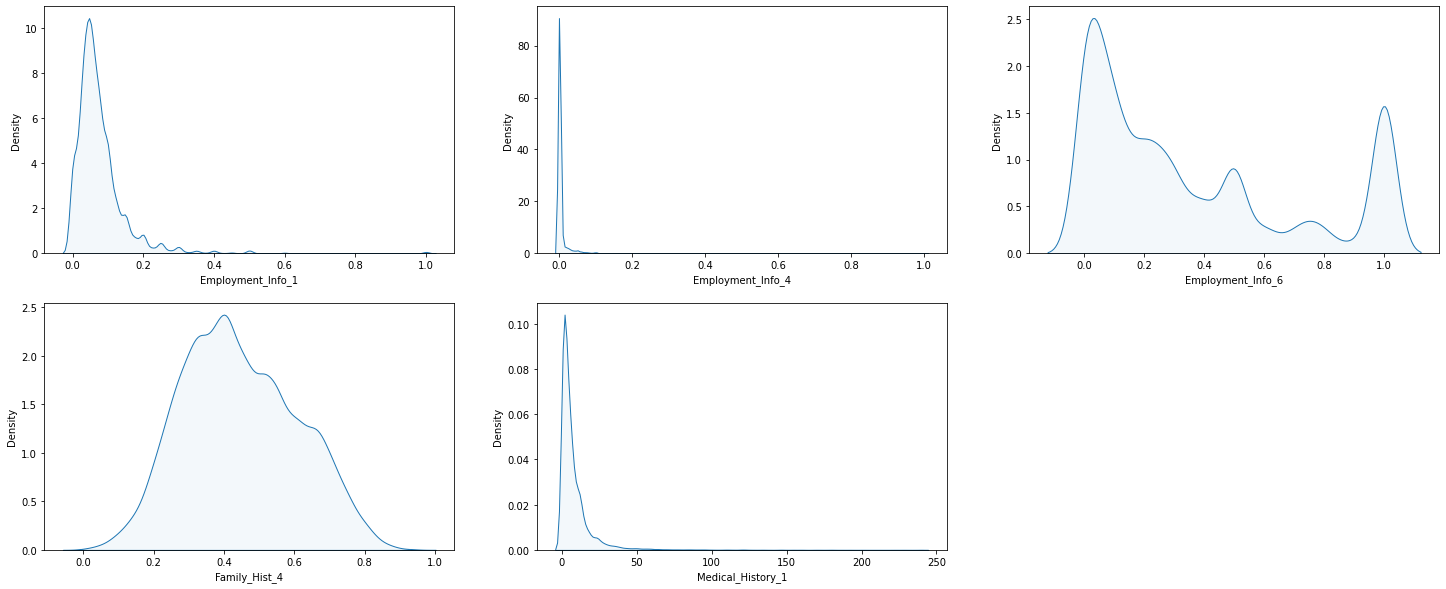

In [24]:
# KDE Plots - Before imputation.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

for i, column in enumerate(main_data_index_set[X_train_post_impute.columns].columns):
    sns.kdeplot(data=main_data_index_set[X_train_post_impute.columns],
                x=column,
                fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])
    
fig.delaxes(axes[1,2])

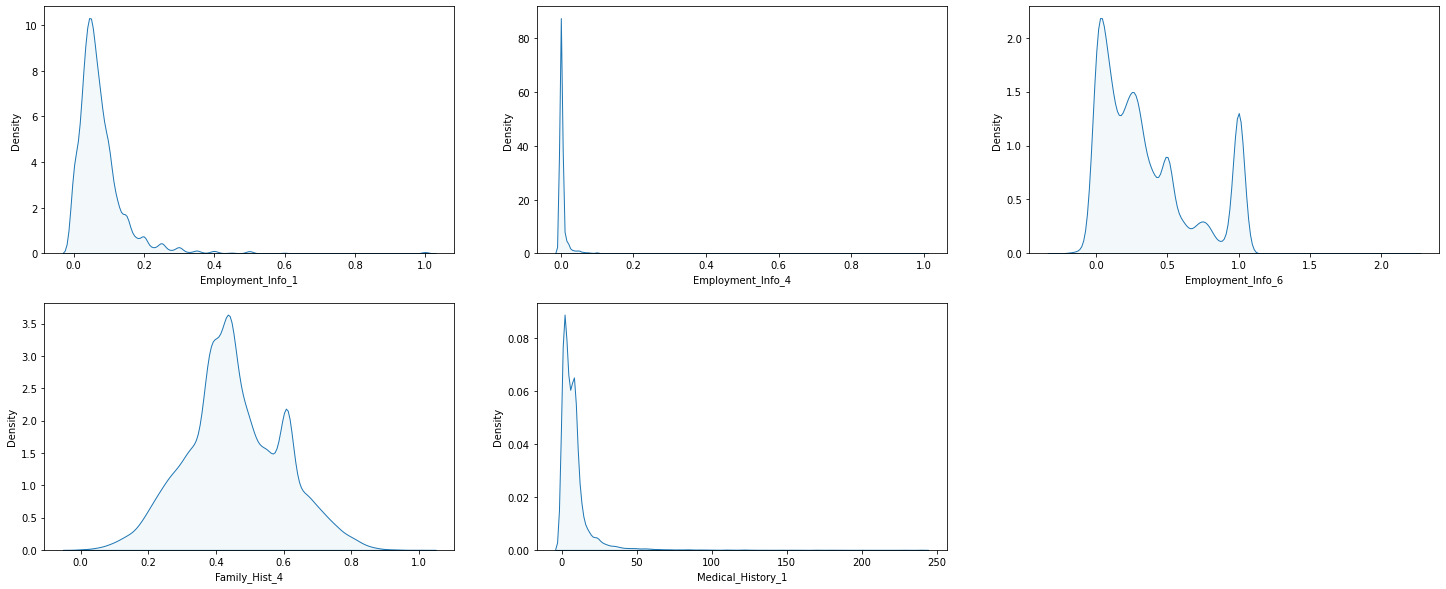

In [25]:
# KDE Plots - After imputation.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

for i, column in enumerate(X_train_post_impute.columns):
    sns.kdeplot(data=X_train_post_impute,
                x=column,
                fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])
    
fig.delaxes(axes[1,2])

> As shown above, three of the five columns' distributions appear to be mostly unchanged - however, we have introduced additional probability density/peak splitting into `Family_Hist_4` (at approx. x=0.4, x=0.6) and `Medical_History_1` (at approx. x=10).
>
> We will need to take care later on, when evaluating the importance of these two features and explaining how we have generated predictions for our chosen model.

# Step 5: Review and consider any other sources of data leakage

> This dataset is comprised of over a hundred variables describing various keywords/attributes of life insurance applicants (i.e. information that they would declare when applying for life insurance). As all of this information will be available at the time of predicting the `Response` variable, the dataset does not feature any sources of target leakage.
> 
> Furthermore, we have used `train_test_split()` in order to split our dataset into training/validation/test samples, so that our models can be assembled/evaluated in a fair manner that does not invoke any form of data snooping/train-test contamination.

# Step 6: Perform feature engineering (using training data)

> In this section, we will implement both supervised (e.g. categorical encoding) and unsupervised (e.g. K-means clustering) learning techniques in order to create new features within our dataset that our models can be fitted to.

In [26]:
# Create a clone copy of each imputed dataset to avoid changing any original data.
copy_X_train_imputed = X_train_imputed.copy()
copy_X_valid_imputed = X_valid_imputed.copy()
copy_X_test_imputed = X_test_imputed.copy()

### One-Hot Encoding

> We will one-hot encode the `Product_Info_2` column, such that any categorical inputs are converted to numerical, machine-interpretable values that can be supplied to each classification model.

In [27]:
from sklearn.preprocessing import OneHotEncoder

# Initialise a one-hot encoder to columns that contain categorical data.
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_col = ['Product_Info_2']

## We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented
## in the training data, and setting sparse=False ensures that the encoded columns are returned as a numpy array
## (instead of a sparse matrix).

# Use the one-hot encoder to transform the categorical data columns. 
OH_col_train = pd.DataFrame(OH_encoder.fit_transform(copy_X_train_imputed[OH_col]))
OH_col_valid = pd.DataFrame(OH_encoder.transform(copy_X_valid_imputed[OH_col]))
OH_col_test = pd.DataFrame(OH_encoder.transform(copy_X_test_imputed[OH_col]))

# One-hot encoding removes the index; re-assign the original index.
OH_col_train.index = copy_X_train_imputed.index
OH_col_valid.index = copy_X_valid_imputed.index
OH_col_test.index = copy_X_test_imputed.index

# Add column-labelling back in, using the get_feature_names() function. 
OH_col_train.columns = OH_encoder.get_feature_names(OH_col)
OH_col_valid.columns = OH_encoder.get_feature_names(OH_col)
OH_col_test.columns = OH_encoder.get_feature_names(OH_col)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
copy_X_train_imputed_no_OH_col = copy_X_train_imputed.drop(OH_col, axis=1)
copy_X_valid_imputed_no_OH_col = copy_X_valid_imputed.drop(OH_col, axis=1)
copy_X_test_imputed_no_OH_col = copy_X_test_imputed.drop(OH_col, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
X_train_enc = pd.concat([copy_X_train_imputed_no_OH_col, OH_col_train], axis=1)
X_valid_enc = pd.concat([copy_X_valid_imputed_no_OH_col, OH_col_valid], axis=1)
X_test_enc = pd.concat([copy_X_test_imputed_no_OH_col, OH_col_test], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Scaling/normalisation
> Next, we perform min-max scaling on the encoded datasets, such that all features lie between 0 and 1 - this is so that, when training any of the classification models, all features will have variances with the same order of magnitude as each other. Thus, no single feature will dominate the objective function and prohibit the model from learning from other features correctly as expected.


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Initialise the MinMaxScaler model, then fit it to the (encoded) training dataset.
MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train_enc)

# Then, normalise/transform the training, validation and test datasets.
X_train_scale = pd.DataFrame(MM_scaler.transform(X_train_enc),
                             index=X_train_enc.index,
                             columns=X_train_enc.columns)

X_valid_scale = pd.DataFrame(MM_scaler.transform(X_valid_enc),
                             index=X_valid_enc.index,
                             columns=X_valid_enc.columns)

X_test_scale = pd.DataFrame(MM_scaler.transform(X_test_enc),
                             index=X_test_enc.index,
                             columns=X_test_enc.columns)

### K-means clustering
> We will now use an unsupervised learning technique known as K-means clustering in order to group together applicants based on their commonalities. In order to do this, we will train our K-means clustering algorithm using the training subset, before predicting cluster groups on all three subsets.
>
> These cluster labels will be incorporated as an additional feature in our datasets, and may in fact prove to be useful in helping to understand applicants' risk rating assignments later on. 

In [29]:
# Create copies of the scaled datasets, prior to performing K-Means clustering.
copy_X_train_scale = X_train_scale.copy()
copy_X_valid_scale = X_valid_scale.copy()
copy_X_test_scale = X_test_scale.copy()

from sklearn.cluster import KMeans

> We will now use the elbow-analysis method for determining the optimal number of clusters to use.

In [30]:
# Determine the optimal number of clusters.
# Method: Cluster the dataset into k clusters, then calculate the inertia/sum of squared distances.
# Repeat this by looping through k=1 to k=30.

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(copy_X_train_scale)
    Sum_of_squared_distances.append(km.inertia_)

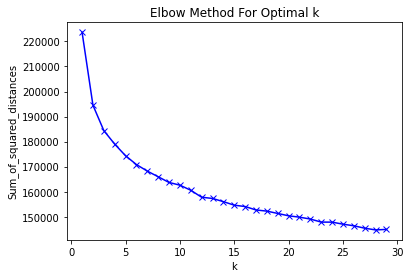

In [31]:
# Create a plot of K-values versus their respective inertias/sums of squared distances.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

> As shown above, the "elbow" of the curve begins to form at *k*=15.
> 
> Increasing *k* beyond this value does not yield a significant benefit in the rate of reduction in the training dataset's inertia - hence, we will set *k*=15 when initialising the `KMeans()` clustering algorithm below.

In [32]:
# Set n_clusters=15, as derived from the elbow-method analysis above:
kmeans = KMeans(n_clusters=15, n_init=10, random_state=0)

# Fit the K-Means clustering algorithm to the training dataset, then predict the train/valid/test datasets.
copy_X_train_scale["Cluster"] = kmeans.fit_predict(copy_X_train_scale)
copy_X_valid_scale["Cluster"] = kmeans.predict(copy_X_valid_scale)
copy_X_test_scale["Cluster"] = kmeans.predict(copy_X_test_scale)

# Convert the cluster labels into one-hot encoded variants.
X_train_cluster_OH_enc = pd.get_dummies(copy_X_train_scale.Cluster).add_prefix('KMeansCluster_')
X_valid_cluster_OH_enc = pd.get_dummies(copy_X_valid_scale.Cluster).add_prefix('KMeansCluster_')
X_test_cluster_OH_enc = pd.get_dummies(copy_X_test_scale.Cluster).add_prefix('KMeansCluster_')

# Re-join the K-Means clustering labels onto the original dataframes.
X_train_KMeans = pd.concat([copy_X_train_scale, X_train_cluster_OH_enc], axis=1)
X_valid_KMeans = pd.concat([copy_X_valid_scale, X_valid_cluster_OH_enc], axis=1)
X_test_KMeans = pd.concat([copy_X_test_scale, X_test_cluster_OH_enc], axis=1)

# Remove the initially derived "Cluster" columns from each dataset.
X_train_KMeans = X_train_KMeans.drop(['Cluster'], axis=1)
X_valid_KMeans = X_valid_KMeans.drop(['Cluster'], axis=1)
X_test_KMeans = X_test_KMeans.drop(['Cluster'], axis=1)

# Step 7: Perform feature selection (using validation data)

> In this section, we will use a number of different methods to determine which features within our dataset will be most important for fitting each of the classification models - this is done in order to prevent overfitting.
>
> At this stage, it is important to now switch over to using the validation dataset for feature selection/model refinement, so that we do not continually rely on the training dataset and risk invoking data leakage into our model generation process.

### Method 1: Mutual Information (MI)

> Here, we will calculate the MI scores of the validation dataset, using two custom functions that rely on the `mutual_info_classif()` function available within `sklearn`.
>
> This will help us to understand whether there are any useful features in our dataset that should be preserved, during feature selection.

In [33]:
# Import the mutual_info_classif() class from sklearn.
from sklearn.feature_selection import mutual_info_classif

# Define a custom function that calculates Mutual Information (MI) scores for a given dataset.
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Define a custom function that plots MI scores in descending order (i.e. most important to least important).
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

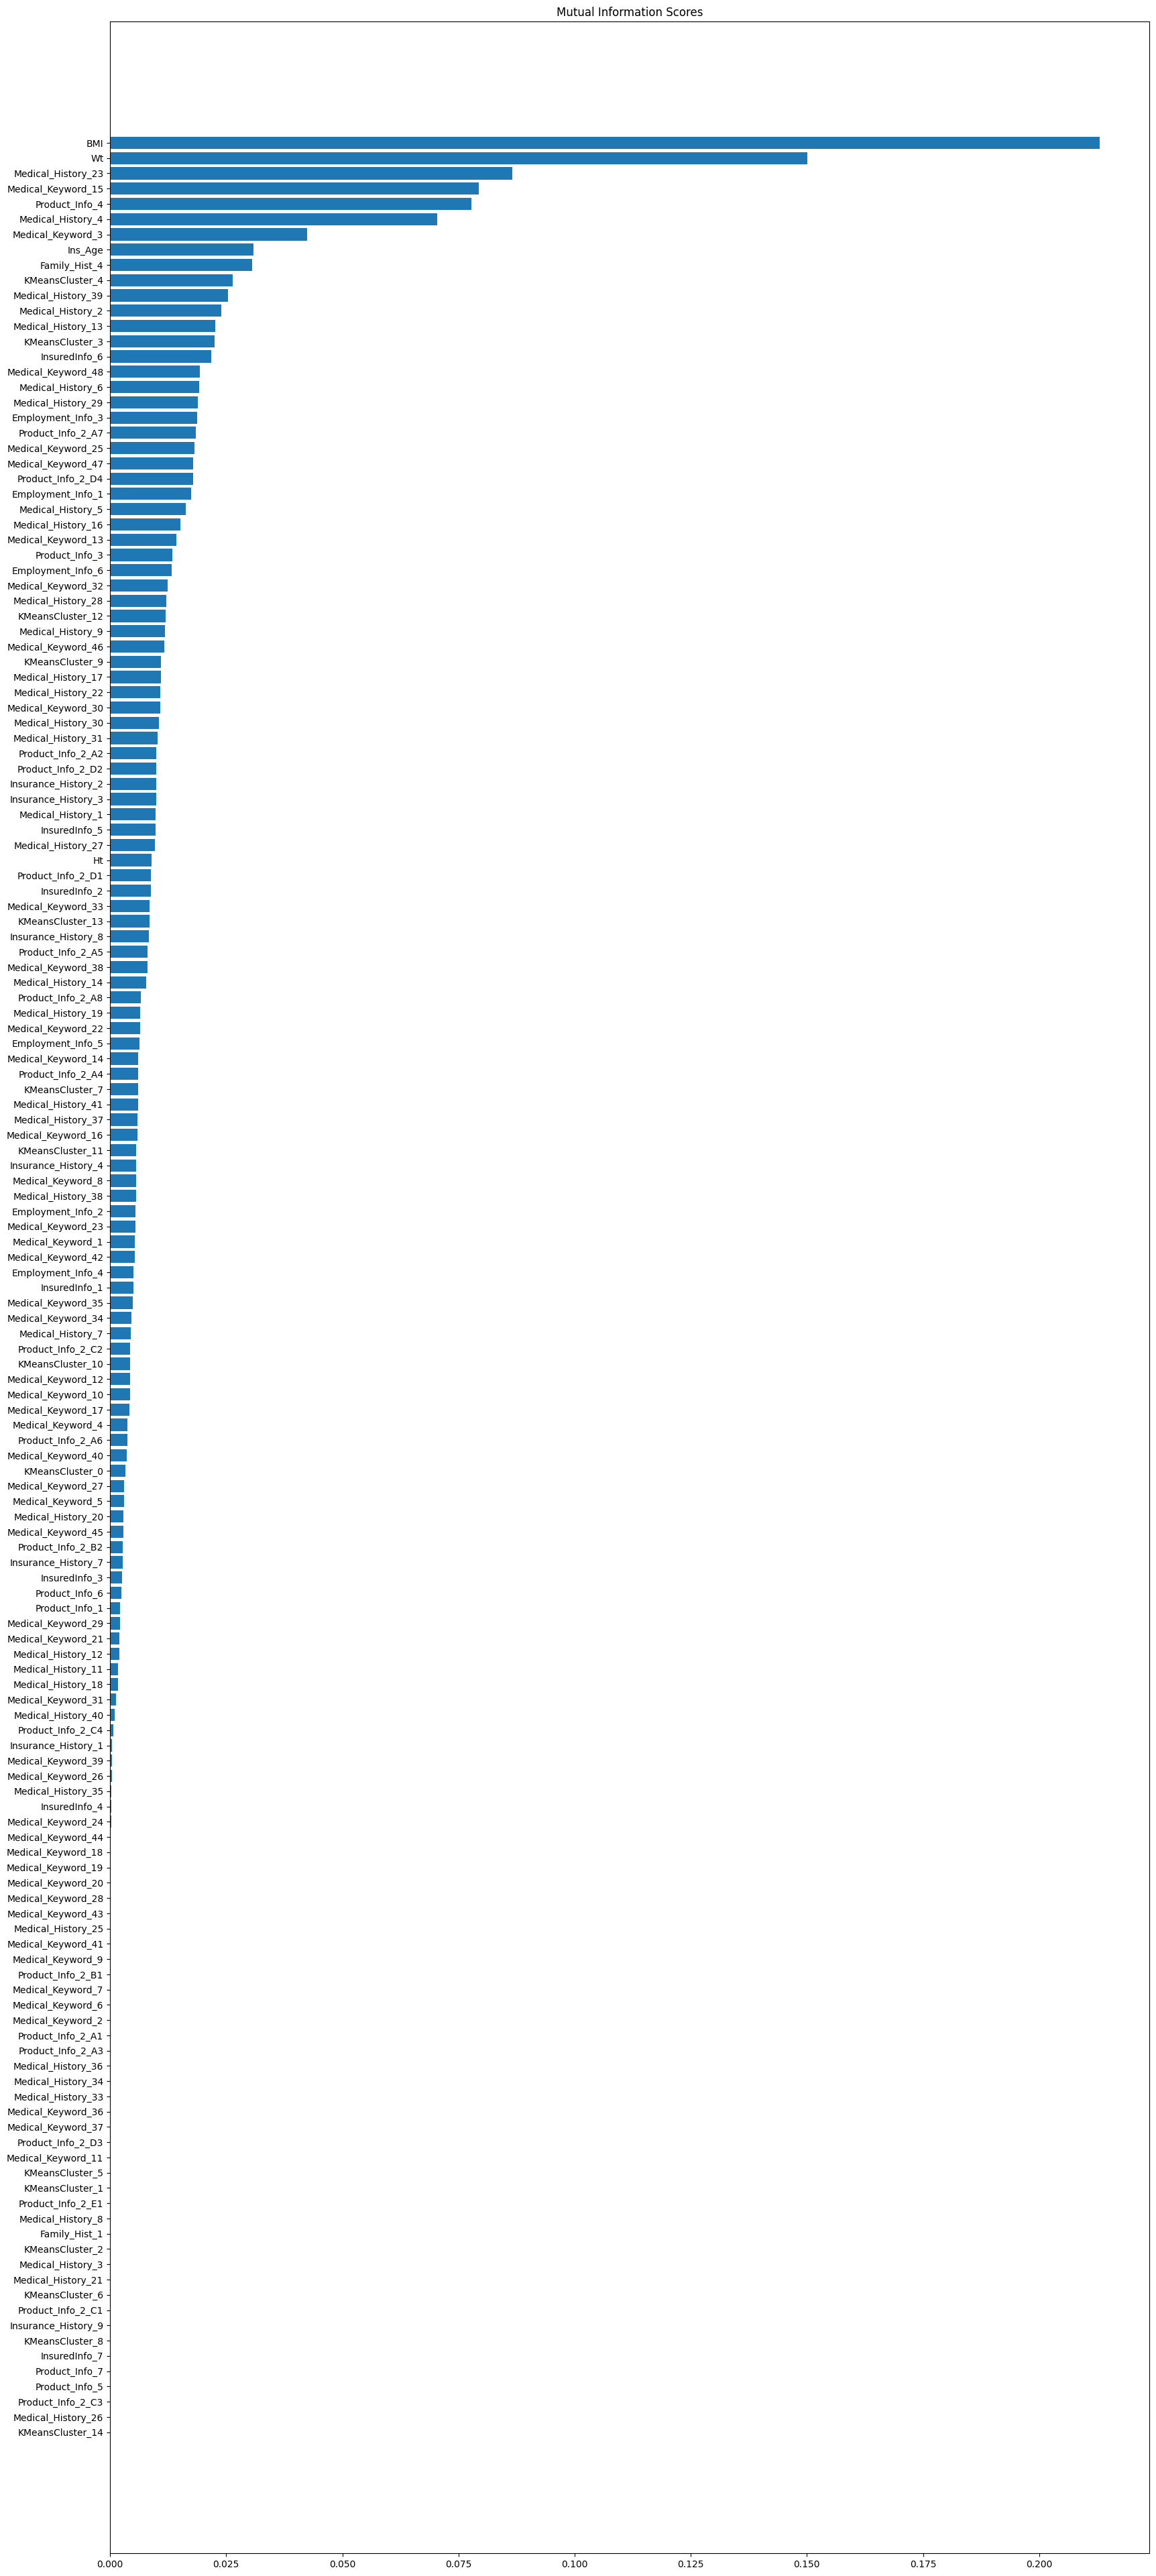

In [34]:
# Calculate MI scores on the validation dataset.
mi_scores_X_valid = make_mi_scores(X_valid_KMeans, y_valid)

# Plot the MI scores obtained from the validation dataset.
plt.figure(dpi=100, figsize=(20,50))
plot_mi_scores(mi_scores_X_valid)

> As per the chart above, we can see that the top 5 ranked features (in descending order) are `BMI`, `Wt`, `Product_Info_4`, `Medical_Keyword_15`, and `Medical_History_23`. This means that these features have strong statistical dependences with the `Response` variable, i.e. that they contribute significantly to reducing uncertainty in the value of the `Response` variable (given a known value of the feature).
>
> Features that have low/zero MI scores indicate that they do not significantly contribute towards reducing this uncertainty, and are hence less useful for guiding our predictions.

### Method 2: Multicollinearity analysis

> We will now review our dataset via Variance Inflation Factor analysis, which is critical for detecting the presence of multicollinearity (i.e. where several independent variables in a model are highly correlated - hence resulting in less reliable statistical inferences).
>
> This will help us to understand whether there are any redundant features in our dataset that *should* not be kept, during feature selection.

In [35]:
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a custom function that calculates variance inflation factor (VIF) scores - for determining multicollinearity.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Calculate VIF scores on the validation dataset.
vif_scores = calc_vif(X_valid_KMeans)
# "RuntimeWarning: divide by zero" can be safely ignored as this is caused by perfectly correlated dummy variables - see link below.

/opt/conda/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Variables         VIF
7                     Ht   27.045798
8                     Wt   95.349680
9                    BMI   60.642469
20   Insurance_History_1   25.299517
22   Insurance_History_3  249.869675
23   Insurance_History_4   11.473263
24   Insurance_History_7   30.914303
25   Insurance_History_8   15.213058
26   Insurance_History_9   34.359952
32     Medical_History_6   57.784309
48    Medical_History_25   43.885302
49    Medical_History_26   57.003850
55    Medical_History_33  101.593259
58    Medical_History_36   14.261330
59    Medical_History_37   10.006428
86    Medical_Keyword_23  104.194425
111   Medical_Keyword_48   57.819650
117    Product_Info_2_A1         inf
118    Product_Info_2_A2         inf
119    Product_Info_2_A3         inf
120    Product_Info_2_A4         inf
121    Product_Info_2_A5         inf
122    Product_Info_2_A6         inf
123    Product_Info_2_A7         inf
124    Product_Info_2_A8         inf
125    Product_Info_2_B1         inf
126    Product_Info_2_B2         inf
127    Product_Info_2_C1         inf
128    Product_Info_2_C2         inf
129    Product_Info_2_C3         inf
130    Product_Info_2_C4         inf
131    Product_Info_2_D1         inf
132    Product_Info_2_D2         inf
133    Product_Info_2_D3         inf
134    Product_Info_2_D4         inf
135    Product_Info_2_E1         inf
136      KMeansCluster_0         inf
137      KMeansCluster_1         inf
138      KMeansCluster_2         inf
139      KMeansCluster_3         inf
140      KMeansCluster_4         inf
141      KMeansCluster_5         inf
142      KMeansCluster_6         inf
143      KMeansCluster_7         inf
144      KMeansCluster_8         inf
145      KMeansCluster_9         inf
146     KMeansCluster_10         inf
147     KMeansCluster_11         inf
148     KMeansCluster_12         inf
149     KMeansCluster_13         inf
150     KMeansCluster_14         inf

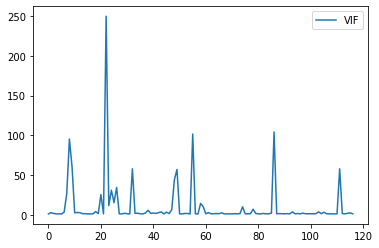

In [36]:
# Plot the VIF scores obtained from the validation dataset. 
vif_scores.plot()

# Display all columns with VIF scores > 10.
vif_scores.loc[vif_scores['VIF'] > 10]

> The features listed above have very high VIF scores, which indicate a high level of multicollinearity. However, in the edge cases where some of these values tend towards infinity, these can be discounted as they represent dummy variables that are perfectly anti-correlated (e.g. one applicant/row in the dataset can only belong to a single K-Means cluster).
> 
> More information on when it is safe to ignore multicollinearity can be found here: [Multicollinearity - Statistical Horizons](https://statisticalhorizons.com/multicollinearity/).

### Method 3: Principal Component Analysis

> Next, we will perform Principal Component Analysis in order to understand the most significant sources of variation within our dataset.
>
> This will help us to understand whether there are particularly useful features in our dataset that *should* be preserved, during feature selection.

In [37]:
# Import/initialise key modules that will be used for visualising the Principal Component Analysis.
from IPython.display import display

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [38]:
# Define a custom function that plots the explained/cumulative variances for each Principal Component (PC) of a given dataset.

def plot_variance(pca, width=8, dpi=100):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component",
               title="% Explained Variance",
               ylim=(0.0, 0.2))
    
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component",
               title="% Cumulative Variance",
               ylim=(0.0, 1.0))
    
    fig.set(figwidth=8, dpi=100)
    return axs

In [39]:
from sklearn.decomposition import PCA

# Initialise the Principal Component Analysis (PCA) algorithm.
pca = PCA()

# Fit the PCA algorithm to the validation dataset, and generate its corresponding PCs.
X_valid_pca = pca.fit_transform(X_valid_KMeans)

# Create a list of labels for each PC, equal in length to the number of columns in the validation dataset.
X_valid_component_names = [f"PC{i+1}" for i in range(X_valid_pca.shape[1])]

# Create a dataframe that contains the PCs generated, along with their respective labels.  
X_valid_pca = pd.DataFrame(X_valid_pca, columns=X_valid_component_names)

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

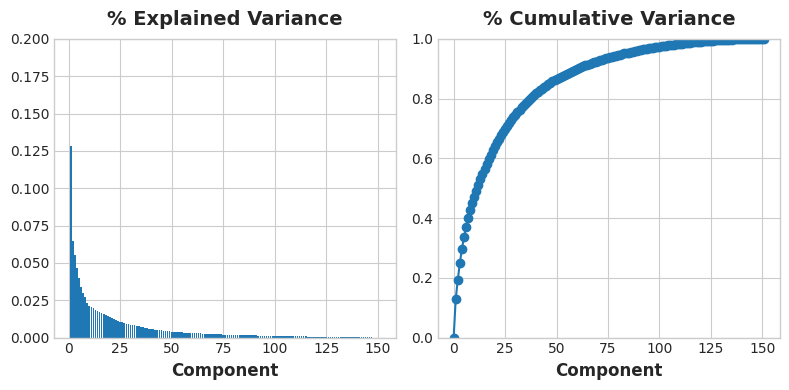

In [40]:
# Use the custom function to plot the explained/cumulative variances, for each PC, within the validation dataset.
plot_variance(pca)

In [41]:
# Calculate the cumulative sum of the explained variation ratios for the first 40 PCs in the validation dataset.
pca.explained_variance_ratio_[:40].cumsum()

array([0.12859865, 0.193459  , 0.24871503, 0.29545209, 0.33540012,
       0.36911841, 0.39898073, 0.42636662, 0.44985507, 0.47100711,
       0.49180059, 0.51127983, 0.53001986, 0.54814744, 0.56556362,
       0.58202661, 0.59771443, 0.61268755, 0.62715421, 0.64083432,
       0.65373409, 0.66639841, 0.67827123, 0.68916319, 0.69951445,
       0.70964413, 0.71937846, 0.72871431, 0.73765447, 0.7463584 ,
       0.75498383, 0.76337151, 0.77116778, 0.7789252 , 0.78600287,
       0.79296622, 0.79953288, 0.80591848, 0.81178939, 0.81753917])

> As shown in the cells above, the first 40 PCs contain just over 80% of the cumulative variance in the validation dataset.
>
> This means that we can still capture a significant majority of the dataset's cumulative variance, were we to use a lower dimensionality feature-space instead, rather than simply using all features together.

In [42]:
# Create a dataframe which displays each principal component's loading/s on each original feature in the dataset.

X_valid_loadings = pd.DataFrame(
    pca.components_.T,  # We need to transpose the matrix of loadings.
    columns=X_valid_component_names,  # Columns are set as the principal components.
    index=X_valid_KMeans.columns,  # Rows are set as the original features.
)
X_valid_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Product_Info_1   -0.003769 -0.004637 -0.015750  0.000145  0.016593 -0.010831   
Product_Info_3    0.007943 -0.010877 -0.097083  0.015198 -0.037971 -0.018033   
Product_Info_4   -0.012884 -0.117451 -0.082020  0.003196 -0.001738 -0.029310   
Product_Info_5    0.002099 -0.002654 -0.007234 -0.000824 -0.001145 -0.000835   
Product_Info_6   -0.005259  0.005865  0.034636 -0.015191 -0.028954  0.036588   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.039587 -0.003455 -0.083228 -0.015300  0.161676 -0.037528   
KMeansCluster_11  0.033066  0.054663  0.029265  0.087035  0.048246 -0.015420   
KMeansCluster_12  0.043571  0.054639 -0.012117  0.133970 -0.089576  0.016283   
KMeansCluster_13  0.040613 -0.117380  0.160979  0.149282  0.066132  0.031778   
KMeansCluster_14 -0.103150 -0.044139  0.023508 -0.032658 -0.021465 -0.236613   

                       PC7       PC8       PC9      PC10  ...     PC142  \
Product_Info_1   -0.014104  0.007636  0.017125  0.010388  ...  0.000301   
Product_Info_3   -0.044593 -0.025587  0.055450 -0.041620  ... -0.003817   
Product_Info_4   -0.155701  0.170772  0.028701  0.026603  ... -0.000449   
Product_Info_5   -0.005115 -0.001407 -0.000451  0.004410  ...  0.000575   
Product_Info_6    0.111188  0.037435 -0.278444 -0.153909  ... -0.000207   
...                    ...       ...       ...       ...  ...       ...   
KMeansCluster_10  0.122172  0.056825  0.157131  0.061266  ...  0.007956   
KMeansCluster_11 -0.037757 -0.051661 -0.046342  0.053218  ... -0.003655   
KMeansCluster_12  0.058922  0.066310  0.019775 -0.061814  ... -0.005071   
KMeansCluster_13  0.097624  0.024101  0.010456 -0.105322  ... -0.000443   
KMeansCluster_14 -0.121508  0.256830 -0.146438  0.039154  ... -0.001337   

                     PC143     PC144     PC145     PC146     PC147     PC148  \
Product_Info_1    0.000986 -0.000124 -0.000749  0.000294  0.001919 -0.000727   
Product_Info_3   -0.005607 -0.002537 -0.000484  0.001469 -0.001370 -0.001171   
Product_Info_4    0.000176 -0.007901  0.000535  0.001393 -0.000646 -0.000461   
Product_Info_5    0.003075 -0.006966 -0.000001 -0.000010 -0.000010  0.000522   
Product_Info_6   -0.000747  0.000034  0.000055  0.000063 -0.000112 -0.000046   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.000643 -0.001773 -0.005306 -0.007922  0.002222  0.191403   
KMeansCluster_11  0.001421 -0.000502  0.001718  0.002216  0.000829  0.190339   
KMeansCluster_12 -0.000765 -0.001372  0.004484  0.001147  0.001892  0.189575   
KMeansCluster_13 -0.000054  0.002090 -0.000494  0.000971  0.001488  0.189989   
KMeansCluster_14 -0.000360  0.003867  0.000606  0.002636 -0.003265 -0.288877   

                     PC149         PC150         PC151  
Product_Info_1    0.000587 -1.618599e-16 -0.000000e+00  
Product_Info_3    0.001111  2.399068e-17 -5.636930e-16  
Product_Info_4    0.000267  1.513432e-16 -5.224290e-17  
Product_Info_5    0.001311  3.166730e-16 -1.158880e-16  
Product_Info_6   -0.000436  2.945497e-17  2.606513e-17  
...                    ...           ...           ...  
KMeansCluster_10  0.001312 -2.462930e-01  7.750125e-02  
KMeansCluster_11  0.001568 -2.462930e-01  7.750125e-02  
KMeansCluster_12  0.000154 -2.462930e-01  7.750125e-02  
KMeansCluster_13 -0.000792 -2.462930e-01  7.750125e-02  
KMeansCluster_14 -0.000947 -2.462930e-01  7.750125e-02  

[151 rows x 151 columns]

> We can also display how each principal component is comprised, in terms of the original features' loadings.
>
> Hence, when looking in the top 40 principal components, we can see which of the original features contribute most strongly towards the cumulative variance of the validation dataset.

In [43]:
X_valid_loadings_first40 = X_valid_loadings.iloc[:, :40]
X_valid_loadings_first40

PC1       PC2       PC3       PC4       PC5       PC6  \
Product_Info_1   -0.003769 -0.004637 -0.015750  0.000145  0.016593 -0.010831   
Product_Info_3    0.007943 -0.010877 -0.097083  0.015198 -0.037971 -0.018033   
Product_Info_4   -0.012884 -0.117451 -0.082020  0.003196 -0.001738 -0.029310   
Product_Info_5    0.002099 -0.002654 -0.007234 -0.000824 -0.001145 -0.000835   
Product_Info_6   -0.005259  0.005865  0.034636 -0.015191 -0.028954  0.036588   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.039587 -0.003455 -0.083228 -0.015300  0.161676 -0.037528   
KMeansCluster_11  0.033066  0.054663  0.029265  0.087035  0.048246 -0.015420   
KMeansCluster_12  0.043571  0.054639 -0.012117  0.133970 -0.089576  0.016283   
KMeansCluster_13  0.040613 -0.117380  0.160979  0.149282  0.066132  0.031778   
KMeansCluster_14 -0.103150 -0.044139  0.023508 -0.032658 -0.021465 -0.236613   

                       PC7       PC8       PC9      PC10  ...      PC31  \
Product_Info_1   -0.014104  0.007636  0.017125  0.010388  ... -0.014858   
Product_Info_3   -0.044593 -0.025587  0.055450 -0.041620  ... -0.011552   
Product_Info_4   -0.155701  0.170772  0.028701  0.026603  ... -0.078927   
Product_Info_5   -0.005115 -0.001407 -0.000451  0.004410  ... -0.004289   
Product_Info_6    0.111188  0.037435 -0.278444 -0.153909  ... -0.031439   
...                    ...       ...       ...       ...  ...       ...   
KMeansCluster_10  0.122172  0.056825  0.157131  0.061266  ... -0.032140   
KMeansCluster_11 -0.037757 -0.051661 -0.046342  0.053218  ... -0.062926   
KMeansCluster_12  0.058922  0.066310  0.019775 -0.061814  ... -0.215956   
KMeansCluster_13  0.097624  0.024101  0.010456 -0.105322  ...  0.252356   
KMeansCluster_14 -0.121508  0.256830 -0.146438  0.039154  ...  0.110495   

                      PC32      PC33      PC34      PC35      PC36      PC37  \
Product_Info_1    0.010853  0.002411 -0.000613 -0.011447  0.008402 -0.010587   
Product_Info_3    0.009175 -0.015254 -0.018082 -0.014543 -0.003713  0.005576   
Product_Info_4   -0.059033  0.193451 -0.107719  0.102541  0.025637 -0.096487   
Product_Info_5   -0.001157 -0.000198  0.002362 -0.001123 -0.003215 -0.002201   
Product_Info_6   -0.007838  0.003579  0.021452  0.036199  0.017494  0.014362   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.111024 -0.053508 -0.028451 -0.128191  0.123342  0.476319   
KMeansCluster_11  0.093175 -0.040131 -0.001739  0.061457  0.056451 -0.022625   
KMeansCluster_12  0.432152 -0.202716 -0.116316  0.038669 -0.102373 -0.179611   
KMeansCluster_13 -0.323834  0.142236  0.079873  0.003952  0.007662 -0.013999   
KMeansCluster_14  0.175999 -0.132046  0.036499  0.055855 -0.016871  0.116332   

                      PC38      PC39      PC40  
Product_Info_1   -0.002280  0.058852 -0.022955  
Product_Info_3   -0.002198  0.026878 -0.012131  
Product_Info_4    0.017489  0.049597 -0.009869  
Product_Info_5   -0.003208  0.002477  0.005461  
Product_Info_6    0.030338 -0.044637  0.006373  
...                    ...       ...       ...  
KMeansCluster_10  0.337089  0.010112  0.039764  
KMeansCluster_11 -0.093334  0.199438  0.138413  
KMeansCluster_12 -0.033277 -0.091660 -0.108206  
KMeansCluster_13  0.007345 -0.067233 -0.039356  
KMeansCluster_14 -0.032598 -0.317251  0.041288  

[151 rows x 40 columns]

In [44]:
useful_cols = []

# Visualise which columns in the top 40 PCs contain notable variance (i.e. where the absolute value of the columns's PC loading is > 0.25).
for col in X_valid_loadings_first40.columns:
    cols = X_valid_loadings_first40[col].loc[abs(X_valid_loadings_first40[col]) > 0.25]
    cols_df = pd.DataFrame(cols)
    useful_cols.append(cols_df)
    
useful_cols

[                          PC1
 Insurance_History_1 -0.297107
 Insurance_History_3  0.493441
 Insurance_History_4 -0.464682
 Insurance_History_7 -0.471985
 Insurance_History_9 -0.250976,
                          PC2
 Medical_History_23 -0.459902
 Medical_Keyword_15  0.412785,
                         PC3
 InsuredInfo_6      0.665413
 Medical_History_4  0.378354,
                           PC4
 Insurance_History_1  0.566426
 Insurance_History_8  0.607005,
                          PC5
 Medical_History_4  -0.387467
 Medical_History_23  0.300944
 Medical_History_33 -0.321972
 Medical_History_41  0.366560
 Medical_Keyword_15 -0.283492
 Medical_Keyword_23  0.322981,
                         PC6
 Product_Info_2_D3  0.741108
 Product_Info_2_D4 -0.464578
 KMeansCluster_2    0.310848,
                          PC7
 InsuredInfo_6       0.258203
 Medical_History_4  -0.266221
 Medical_History_29  0.380458
 Medical_History_41 -0.525100,
                         PC8
 Product_Info_2_D3  0.302310
 Pr

> The cell above indicates which columns/features appear most commonly throughout the top 40 PCs (which contain over 80% of the cumulative variance in the dataset).
>
> The more frequently a column name appears above, the more indicative this is that the column is useful for capturing significant variance within the dataset. It is thus more important for the models to place greater importance on these features later on.

### Method 4: Lasso (L1) Regularisation

> Finally, we will perform feature selection via L1 (lasso) regularisation using functions that are readily available in `sklearn` - for more information, see this link: [Feature Selection via scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection).

In [45]:
# Import key modules in order to perform LASSO-based feature selection.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Establish the Lasso (L1) Regularisation model that will perform feature selection.
linearsvc = LinearSVC(penalty="l1", dual=False, tol=1e-3, C=1e-2, random_state=0).fit(X_valid_KMeans, y_valid)
model = SelectFromModel(linearsvc, prefit=True)

# Reduce the dataset to the most important features, using the regularisation model above.
X_valid_L1 = model.transform(X_valid_KMeans)

# Convert the transformed dataset into a dataframe with the same size/shape as the original dataset.
# For features that were previously removed, this dataset will now include zeroes instead of their original values.
selected_features = pd.DataFrame(model.inverse_transform(X_valid_L1),
                                 index=X_valid_KMeans.index,
                                 columns=X_valid_KMeans.columns)

# Drop columns from the dataframe where features are deemed unimportant in capturing the dataset's variance.
# To achieve this, we selectively drop columns where their variance is equal to 0 (i.e. where a column only contains zeroes).
X_valid_L1reg = selected_features.drop(selected_features.columns[selected_features.var() == 0], axis=1)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [46]:
# Determine the number of columns that are kept after L1 regularisation.

len(selected_features.columns[selected_features.var() != 0])

57

> We have now reduced our dataset down to 57 features, from a starting value of 126.
>
> Next, we will transform our training/test subsets so that they are now constrained to the same set of columns as derived above.

In [47]:
# Produce a separate list containing the columns preserved after L1 regularisation.
selected_columns = selected_features.columns[selected_features.var() != 0]

# Reduce the training/test datasets to the same set of columns.
X_train_L1reg = X_train_KMeans[selected_columns]
X_test_L1reg = X_test_KMeans[selected_columns]

# Step 8: Define the classifiers/models used

> In this project, we aim to predict the target (`Response`) as well as the likelihood of belonging to the predicted group using the following approaches:
> 
> 1. Logistic/Softmax Regression
> 
>> **Softmax Regression** is a generalised form of the standard logistic regression model. Given an instance $X$, input features are supplied to the model in order to compute a score for each class - then, the probability of $X$ belonging to each class is estimated by applying the softmax function (which calculates the exponential of every score, then normalises them). Then, the algorithm returns a prediction as the class with the highest estimated probability (simply the class with the highest score).
> 
> 2. Gaussian Naive Bayes
> 
>> **Gaussian Naive Bayes** works as an extension of Naive Bayes (which is termed as "naive" due to its main assumption that all features are independent), by instead assuming that each feature within the data can be represented by a normal/Gaussian distribution. As a result, we only need to calculate the mean/standard deviation of each Gaussian distribution in order to predict the likelihood of an instance belonging to a given class, reducing computational complexity as compared to using other Bayesian methods.
> 
> 3. Support Vector Machines
> 
>> **Support Vector Machines** are capable of performing linear or nonlinear classification, and are particularly well-suited for classification of complex small- and medium-sized datasets/segmentation of high dimensionality feature spaces. They essentially work by fitting the widest possible margin between each of the classes, as a function of each of the dataset's features. As can be imagined, this technique is sensitive to feature scaling, which is why min-max scaling was performed earlier above.
> 
> 4. Decision Trees/Random Forests
> 
>> **Decision Trees** are powerful and versatile algorithms that are capable of fitting to/classifying complex datasets. They are generated by splitting a training dataset into two subsets recursively, based on a single feature and a corresponding threshold value (which are chosen as the pair that produces subsets with the lowest possible Gini impurity).
>>
>> **Random Forest Classification** works by training multiple decision trees, based on the random sampling (with replacement) of a training dataset. Input features from an unseen dataset can then be supplied to each trained decision tree in order to generate a prediction, which is subsequently averaged across all predictions to produce a final classification output; averaging across all predictions has the benefit of reducing overfitting to any given random sample within the training set.
>
> 5. Gradient Boosting Classifiers
> 
>> **Boosting** refers to any ensemble method that combines several weak "learners" into a strong learner. Usually, this is accomplished by training predictors sequentially, where each tries to correct its predecessor.
>>
>> With **AdaBoost classifiers**, a base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances, and then trains a second classifier using the updated weights, before making a new set of predictions. This loop is usually repeated up until there is no significant improvement in the last round's performance, or until the maximum number of iterations has been reached.
>>
>> In the case of **Gradient Boosting classifiers**, the algorithm works very similarly to that used for training AdaBoost classifiers, which is by sequentially adding predictors to an ensemble - except for that, instead of updating instance weights at every iteration, the next predictor is instead fitted to the residual errors made by the previous predictor. Over the course of several iterations, this can lead to a highly refined model which is capable of recognising complex nuances in the training dataset and providing accurate classifications, however care must also be taken to avoid overfitting.

In [48]:
# Import the classification models from sklearn/xgboost.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Step 9: Perform hyperparameter optimisation via grid-search methods (using validation data)

> Here, we will utilise exhaustive grid-search methods in order to optimise several of the models' hyperparameters. These are:
>
>> `LogisticRegression`
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>>
>>`GaussianNB`
>> * `var_smoothing` represents the degree to which we widen/"smooth" our Gaussian distributions, to account for additional samples that are further away from the distribution mean.
>> 
>>`SVC(kernel="linear")`
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> 
>>`LinearSVC`
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>> 
>>`SVC(kernel="poly")`
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>> * `degree` represents the degree of the polynomial kernel function that we want the model to fit.
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> 
>>`SVC(kernel="rbf")`
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> 
>>`SVC(kernel="sigmoid")`
>> * `C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
>> * `tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
>> 
>>`DecisionTreeClassifier`
>> * `max_depth` represents the maximum depth of the tree, thus determining how strongly the model fits to the data.
>> * `max_features` represents the number of features to consider, when looking for the optimum split.
>> 
>>`RandomForestClassifier`
>> * `n_estimators` represents the number of decision trees that are implemented by the random forest classifier.
>> * `max_depth` represents the maximum depth of the tree, thus determining how strongly the model fits to the data.
>> * `max_features` represents the number of features to consider, when looking for the optimum split.
>> 
>>`AdaBoostClassifier`
>> * `n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.
>> * `learning_rate` represents the contribution weighting applied to each decision tree, at each boosting iteration.
>> 
>>`GradientBoostingClassifier`
>> * `learning_rate` represents the contribution weighting applied to each decision tree, at each boosting iteration.
>> * `n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.
>> 
>>`XGBClassifier`
>> * `n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.
>> * `learning_rate` represents the contribution weighting applied to each decision tree, at each boosting iteration.
>>
>
> More information regarding exhaustive grid-search methods can be found at the following page: [Exhaustive grid-search methods for tuning hyperparameters - scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search).

In [49]:
# Import the GridSearchCV function from sklearn.

from sklearn.model_selection import GridSearchCV

### Initialise each model

> We set up each of the classifiers as baseline models, by initialising each model as a new object.

In [50]:
## Initialise each classifier - these are capable of providing predictions as well as their associated probabilities/likelihoods/confidences.

### Logistic/softmax regressors
Model1_Base = LogisticRegression(random_state=0,
                                 solver='liblinear')

### Naive Bayes classifiers
Model2_Base = GaussianNB()

### Support Vector Machines (linear/non-linear)
Model3_Base = SVC(kernel='linear',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model4_Base = LinearSVC(dual=False,
                        random_state=0,
                        max_iter=1000)

Model5_Base = SVC(kernel='poly',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model6_Base = SVC(kernel='rbf',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model7_Base = SVC(kernel='sigmoid', 
                  probability=True,
                  max_iter=1000,
                  random_state=0)

### Decision Trees
Model8_Base = DecisionTreeClassifier(random_state=0)

### Random Forests
Model9_Base = RandomForestClassifier(n_jobs=-1,
                                     random_state=0)

### Gradient Boosting Machines
Model10_Base = AdaBoostClassifier(random_state=0)

Model11_Base = GradientBoostingClassifier(random_state=0)

Model12_Base = XGBClassifier(random_state=0,
                             n_jobs=-1,
                             eval_metric="merror")

### Declare the hyperparameter grids for each model

> Next, we declare the models' parameter grids that we require the grid-searches to be performed over.

In [51]:
# Config for model 1 - LogisticRegression.
param_grid_model1 = {'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                     'C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001]}


# Config for model 2 - GaussianNB.
param_grid_model2 = {'var_smoothing': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]}


# Config for model 3 - SVC (linear kernel).
param_grid_model3 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 4 - LinearSVC.
param_grid_model4 = {'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06],
                     'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}


# Config for model 5 - SVC (polynomial kernel).
param_grid_model5 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'degree': [0, 1, 2, 3, 4, 5, 6],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 6 - SVC (rbf kernel).
param_grid_model6 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 7 - SVC (sigmoid kernel).
param_grid_model7 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 8 - DecisionTreeClassifier.
param_grid_model8 = {'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                     'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}


# Config for model 9 - RandomForestClassifier.
param_grid_model9 = {'n_estimators': [10, 100, 250, 500, 1000],
                     'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                     'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}


# Config for model 10 - AdaBoostClassifier.
param_grid_model10 = {'n_estimators': [10, 100, 250, 500, 1000],
                      'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05]}


# Config for model 11 - GradientBoostingClassifier.
param_grid_model11 = {'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05],
                      'n_estimators': [10, 100, 250, 500, 1000]}


# Config for model 12 - XGBClassifier.
param_grid_model12 = {'n_estimators': [10, 100, 250, 500, 1000],
                      'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05]}

# Create a list containing each of the baseline models.
BaseModels = [Model1_Base, Model2_Base, Model3_Base, 
              Model4_Base, Model5_Base, Model6_Base,
              Model7_Base, Model8_Base, Model9_Base,
              Model10_Base, Model11_Base, Model12_Base]

# Create a list containing each of the model's parameter-grid dictionaries.
ParamGrids = [param_grid_model1, param_grid_model2, param_grid_model3, 
              param_grid_model4, param_grid_model5, param_grid_model6,
              param_grid_model7, param_grid_model8, param_grid_model9,
              param_grid_model10, param_grid_model11, param_grid_model12]

### Define a custom gridsearch function to time each experiment

> In order to run each grid-search consecutively in a single loop, we define a custom function that performs a grid-search optimisation for a given model, and returns an object containing a set of optimised hyperparameters that can be easily retrieved afterwards.

In [52]:
from datetime import datetime
import pytz

# Define a custom function that performs a grid-search for a given model and parameter grid.
def GridSearcher(model, param_grid):
    ## Startup
    timezone = pytz.timezone('Europe/London')
    start_time = datetime.now(timezone)
    print("Running GridSearchCV for:", str(model))
    print("Starting at:",start_time.strftime("%H:%M:%S"))
    
    ## Perform the grid-search
    GridSearcher = GridSearchCV(model, param_grid, scoring='balanced_accuracy', refit=False, error_score='raise', verbose=2)
    GridSearcher.fit(X_valid_L1reg, y_valid)
    # HOLDOUT n_jobs=-1
    
    ## Finish
    finish_time = datetime.now(timezone)
    print("Finished at:", finish_time.strftime("%H:%M:%S"))
    duration = finish_time - start_time
    dur = divmod(duration.seconds, 60)
    print("Duration: ", dur[0], 'minutes', dur[1], 'seconds')
    return GridSearcher

### Run grid-searches for all models

> For each model, we loop through the custom grid-search function and retrieve its optimised hyperparameters.
>
> This section is commented out as it takes several hours to run.

In [53]:
##     tz = pytz.timezone('Europe/London')
##     start = datetime.now(tz)
##     print("GridSearchCV runs starting at:",start.strftime("%H:%M:%S"))

##     for i in range(0, 12):
##         GridSearchResult = GridSearcher(BaseModels[i], ParamGrids[i])
##         print(GridSearchResult.best_params_)
##         GridSearchResults.append(GridSearchResult)
    
##     finish = datetime.now(tz)
##     print("GridSearchCV runs finished at:", finish.strftime("%H:%M:%S"))
##     duration = finish - start
##     dur = divmod(duration.seconds, 60)
##     print("Total Duration: ", dur[0], 'minutes', dur[1], 'seconds')

##     for i in GridSearchResults:
##         print(i.best_params_)

In [54]:
# The following sets of optimised hyperparameters were obtained via the cell above.

Model1_Opt_Params = {'C': 100.0, 'tol': 0.01}
Model2_Opt_Params = {'var_smoothing': 0.0001}
Model3_Opt_Params = {'C': 1.0, 'tol': 0.1}
Model4_Opt_Params = {'C': 100, 'tol': 0.001}
Model5_Opt_Params = {'C': 0.1, 'degree': 6, 'tol': 0.1}
Model6_Opt_Params = {'C': 10, 'tol': 0.01}
Model7_Opt_Params = {'C': 1.0, 'tol': 0.01}
Model8_Opt_Params = {'max_depth': 10, 'max_features': 0.8}
Model9_Opt_Params = {'max_depth': 40, 'max_features': 0.6, 'n_estimators': 1000}
Model10_Opt_Params = {'learning_rate': 1.0, 'n_estimators': 100}
Model11_Opt_Params = {'learning_rate': 0.1, 'n_estimators': 250}
Model12_Opt_Params = {'learning_rate': 1.0, 'n_estimators': 10}

# Create a list containing each of the models' optimised hyperparameters.
OptimisedParams = [Model1_Opt_Params, Model2_Opt_Params, Model3_Opt_Params,
                   Model4_Opt_Params, Model5_Opt_Params, Model6_Opt_Params,
                   Model7_Opt_Params, Model8_Opt_Params, Model9_Opt_Params,
                   Model10_Opt_Params, Model11_Opt_Params, Model12_Opt_Params]

### Update all baseline models to use optimised hyperparameters

> Finally, we update the baseline models declared earlier above, by passing the optimised hyperparameters to each model using the `.set_params(**kwargs)` method.

In [55]:
OptimisedModels = []

# Update each of the baseline models to include their (respective) optimised hyperparameters.
for i in range(0, 12):
    OptimisedModel = BaseModels[i].set_params(**OptimisedParams[i])
    OptimisedModels.append(OptimisedModel)
    
OptimisedModels

[LogisticRegression(C=100.0, random_state=0, solver='liblinear', tol=0.01),
 GaussianNB(var_smoothing=0.0001),
 SVC(kernel='linear', max_iter=1000, probability=True, random_state=0, tol=0.1),
 LinearSVC(C=100, dual=False, random_state=0, tol=0.001),
 SVC(C=0.1, degree=6, kernel='poly', max_iter=1000, probability=True,
     random_state=0, tol=0.1),
 SVC(C=10, max_iter=1000, probability=True, random_state=0, tol=0.01),
 SVC(kernel='sigmoid', max_iter=1000, probability=True, random_state=0, tol=0.01),
 DecisionTreeClassifier(max_depth=10, max_features=0.8, random_state=0),
 RandomForestClassifier(max_depth=40, max_features=0.6, n_estimators=1000,
                        n_jobs=-1, random_state=0),
 AdaBoostClassifier(n_estimators=100, random_state=0),
 GradientBoostingClassifier(n_estimators=250, random_state=0),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_

# Step 10: Train each model (using training data)

> In this section, we will now train our optimised models on the encoded training dataset.

In [56]:
# Create a duplicate copy of the OptimisedModels list, for use in model training.
TrainedModels = OptimisedModels

> XGBoost's classifiers require labels to be supplied in a zero-based fashion (i.e. classes 1-8 must instead be converted into labels 0-7 prior to training/prediction). Previously, this would have been handled automatically via the use of the `use_label_encoder` keyword argument - however, we must now explicitly label-encode our dataset prior to fitting/predicting as this has since become deprecated.
>
> Hence, we will establish a label encoder that converts the classes into compatible labels.

In [57]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 12) - "use_label_encoder" has since become deprecated.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert each set of class labels (1-8) into encoded labels (0-7).
y_train = le.fit_transform(y_train)
y_valid = le.transform(y_valid)
y_test = le.transform(y_test)

> We can now train all of our models using the encoded/transformed labels.

In [58]:
# Train each of the optimised models, using the training dataset.
for model in TrainedModels:
    tz = pytz.timezone('Europe/London')
    start = datetime.now(tz)
    print("Model training started at:",start.strftime("%H:%M:%S"))
    model.fit(X_train_L1reg, y_train)
    finish = datetime.now(tz)
    print("Model training finished at:",finish.strftime("%H:%M:%S"))
    duration = finish - start
    dur = divmod(duration.seconds, 60)
    print("Total Duration for model training: ", dur[0], 'minutes', dur[1], 'seconds')
    print("Model "+str(TrainedModels.index(model)+1)+" - "+model.__class__.__name__+" has been trained.")

Model training started at: 16:30:08
Model training finished at: 16:30:12
Total Duration for model training:  0 minutes 3 seconds
Model 1 - LogisticRegression has been trained.
Model training started at: 16:30:12
Model training finished at: 16:30:12
Total Duration for model training:  0 minutes 0 seconds
Model 2 - GaussianNB has been trained.
Model training started at: 16:30:12


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Model training finished at: 16:33:35
Total Duration for model training:  3 minutes 22 seconds
Model 3 - SVC has been trained.
Model training started at: 16:33:35
Model training finished at: 16:33:41
Total Duration for model training:  0 minutes 6 seconds
Model 4 - LinearSVC has been trained.
Model training started at: 16:33:41


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Model training finished at: 16:37:02
Total Duration for model training:  3 minutes 20 seconds
Model 5 - SVC has been trained.
Model training started at: 16:37:02


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Model training finished at: 16:41:00
Total Duration for model training:  3 minutes 58 seconds
Model 6 - SVC has been trained.
Model training started at: 16:41:00


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Model training finished at: 16:47:15
Total Duration for model training:  6 minutes 15 seconds
Model 7 - SVC has been trained.
Model training started at: 16:47:15
Model training finished at: 16:47:16
Total Duration for model training:  0 minutes 0 seconds
Model 8 - DecisionTreeClassifier has been trained.
Model training started at: 16:47:16
Model training finished at: 16:48:32
Total Duration for model training:  1 minutes 15 seconds
Model 9 - RandomForestClassifier has been trained.
Model training started at: 16:48:32
Model training finished at: 16:48:36
Total Duration for model training:  0 minutes 4 seconds
Model 10 - AdaBoostClassifier has been trained.
Model training started at: 16:48:36
Model training finished at: 16:51:01
Total Duration for model training:  2 minutes 25 seconds
Model 11 - GradientBoostingClassifier has been trained.
Model training started at: 16:51:01
Model training finished at: 16:51:05
Total Duration for model training:  0 minutes 3 seconds
Model 12 - XGBClassif

# Step 11: Perform probability calibration on each model (using validation data)

> Our models are now capable of providing predictions as well as some initial probability estimates - however, we wish to obtain true probabilities as currently, by default, ours do not yet factor in the expected distributions of the predicted classes. To this end, we will need to perform probability calibration for all of our models, so that they are capable of providing true likelihoods of belonging to each respective class.
>
> More information on this topic can be found at the following page: [Probability Calibration - scikit-learn](https://scikit-learn.org/stable/modules/calibration.html).

In [59]:
from sklearn.calibration import CalibratedClassifierCV

In [60]:
# Calibrate each classifier using the validation dataset.

Model1_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[0], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model2_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[1], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model3_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[2], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model4_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[3], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model5_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[4], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model6_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[5], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model7_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[6], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model8_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[7], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model9_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[8], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model10_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[9], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model11_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[10], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)
Model12_Calibrated = CalibratedClassifierCV(base_estimator=TrainedModels[11], method="isotonic", cv="prefit").fit(X_valid_L1reg, y_valid)

In [61]:
# Use each model to generate predictions (as probability estimates of belonging to each Response class) from the validation dataset.

Model1_Valid_PredProb = Model1_Calibrated.predict_proba(X_valid_L1reg)
Model2_Valid_PredProb = Model2_Calibrated.predict_proba(X_valid_L1reg)
Model3_Valid_PredProb = Model3_Calibrated.predict_proba(X_valid_L1reg)
Model4_Valid_PredProb = Model4_Calibrated.predict_proba(X_valid_L1reg)
Model5_Valid_PredProb = Model5_Calibrated.predict_proba(X_valid_L1reg)
Model6_Valid_PredProb = Model6_Calibrated.predict_proba(X_valid_L1reg)
Model7_Valid_PredProb = Model7_Calibrated.predict_proba(X_valid_L1reg)
Model8_Valid_PredProb = Model8_Calibrated.predict_proba(X_valid_L1reg)
Model9_Valid_PredProb = Model9_Calibrated.predict_proba(X_valid_L1reg)
Model10_Valid_PredProb = Model10_Calibrated.predict_proba(X_valid_L1reg)
Model11_Valid_PredProb = Model11_Calibrated.predict_proba(X_valid_L1reg)
Model12_Valid_PredProb = Model12_Calibrated.predict_proba(X_valid_L1reg)

In [62]:
## Convert the probability estimates into label-based predictions, then label-encode for compatibility with XGBoost.

# Model 1 - converting probabilities into label predictions
Model1_Valid_Preds = np.argmax(Model1_Valid_PredProb, axis=1)
Model1_Valid_Classes = Model1_Calibrated.classes_
Model1_Valid_Preds = [Model1_Valid_Classes[i] for i in Model1_Valid_Preds]
Model1_Valid_Preds = le.inverse_transform(Model1_Valid_Preds)

# Model 2 - converting probabilities into label predictions
Model2_Valid_Preds = np.argmax(Model2_Valid_PredProb, axis=1)
Model2_Valid_Classes = Model2_Calibrated.classes_
Model2_Valid_Preds = [Model2_Valid_Classes[i] for i in Model2_Valid_Preds]
Model2_Valid_Preds = le.inverse_transform(Model2_Valid_Preds)

# Model 3 - converting probabilities into label predictions
Model3_Valid_Preds = np.argmax(Model3_Valid_PredProb, axis=1)
Model3_Valid_Classes = Model3_Calibrated.classes_
Model3_Valid_Preds = [Model3_Valid_Classes[i] for i in Model3_Valid_Preds]
Model3_Valid_Preds = le.inverse_transform(Model3_Valid_Preds)

# Model 4 - converting probabilities into label predictions
Model4_Valid_Preds = np.argmax(Model4_Valid_PredProb, axis=1)
Model4_Valid_Classes = Model4_Calibrated.classes_
Model4_Valid_Preds = [Model4_Valid_Classes[i] for i in Model4_Valid_Preds]
Model4_Valid_Preds = le.inverse_transform(Model4_Valid_Preds)

# Model 5 - converting probabilities into label predictions
Model5_Valid_Preds = np.argmax(Model5_Valid_PredProb, axis=1)
Model5_Valid_Classes = Model5_Calibrated.classes_
Model5_Valid_Preds = [Model5_Valid_Classes[i] for i in Model5_Valid_Preds]
Model5_Valid_Preds = le.inverse_transform(Model5_Valid_Preds)

# Model 6 - converting probabilities into label predictions
Model6_Valid_Preds = np.argmax(Model6_Valid_PredProb, axis=1)
Model6_Valid_Classes = Model6_Calibrated.classes_
Model6_Valid_Preds = [Model6_Valid_Classes[i] for i in Model6_Valid_Preds]
Model6_Valid_Preds = le.inverse_transform(Model6_Valid_Preds)

# Model 7 - converting probabilities into label predictions
Model7_Valid_Preds = np.argmax(Model7_Valid_PredProb, axis=1)
Model7_Valid_Classes = Model7_Calibrated.classes_
Model7_Valid_Preds = [Model7_Valid_Classes[i] for i in Model7_Valid_Preds]
Model7_Valid_Preds = le.inverse_transform(Model7_Valid_Preds)

# Model 8 - converting probabilities into label predictions
Model8_Valid_Preds = np.argmax(Model8_Valid_PredProb, axis=1)
Model8_Valid_Classes = Model8_Calibrated.classes_
Model8_Valid_Preds = [Model8_Valid_Classes[i] for i in Model8_Valid_Preds]
Model8_Valid_Preds = le.inverse_transform(Model8_Valid_Preds)

# Model 9 - converting probabilities into label predictions
Model9_Valid_Preds = np.argmax(Model9_Valid_PredProb, axis=1)
Model9_Valid_Classes = Model9_Calibrated.classes_
Model9_Valid_Preds = [Model9_Valid_Classes[i] for i in Model9_Valid_Preds]
Model9_Valid_Preds = le.inverse_transform(Model9_Valid_Preds)

# Model 10 - converting probabilities into label predictions
Model10_Valid_Preds = np.argmax(Model10_Valid_PredProb, axis=1)
Model10_Valid_Classes = Model10_Calibrated.classes_
Model10_Valid_Preds = [Model10_Valid_Classes[i] for i in Model10_Valid_Preds]
Model10_Valid_Preds = le.inverse_transform(Model10_Valid_Preds)

# Model 11 - converting probabilities into label predictions
Model11_Valid_Preds = np.argmax(Model11_Valid_PredProb, axis=1)
Model11_Valid_Classes = Model11_Calibrated.classes_
Model11_Valid_Preds = [Model11_Valid_Classes[i] for i in Model11_Valid_Preds]
Model11_Valid_Preds = le.inverse_transform(Model11_Valid_Preds)

# Model 12 - converting probabilities into label predictions
Model12_Valid_Preds = np.argmax(Model12_Valid_PredProb, axis=1)
Model12_Valid_Classes = Model12_Calibrated.classes_
Model12_Valid_Preds = [Model12_Valid_Classes[i] for i in Model12_Valid_Preds]
Model12_Valid_Preds = le.inverse_transform(Model12_Valid_Preds)

# Step 12: Evaluate the performance of each model (using validation data)

> In a real-world situation, other factors - such as training time, model explainability and costs/difficulties associated with model deployment/maintenance - will also have an impact on which model should be chosen for live use.
>
> However, for the purposes of this project we are simply aiming to compare each of the machine learning algorithms used thus far, solely based in terms of their predictive performances, in order to select the "best" model. In the code below, a number of techniques are demonstrated in order to display how each model has performed in terms of classifying applicants into each Response group.
>
> We will use a combination of functions across both `sklearn` as well as `scikitplot` in order to visualise each model's performance.

In [63]:
# Import key modules/functions for evaluating model performance.
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score

In [64]:
# Convert the validation dataset's encoded labels (0-7) back to the original set of classes (1-8), for clearer reviews of model performance.
y_valid = le.inverse_transform(y_valid)

# Create a list containing each model's predicted labels.
Valid_Preds = [Model1_Valid_Preds, Model2_Valid_Preds, Model3_Valid_Preds,
               Model4_Valid_Preds, Model5_Valid_Preds, Model6_Valid_Preds,
               Model7_Valid_Preds, Model8_Valid_Preds, Model9_Valid_Preds,
               Model10_Valid_Preds, Model11_Valid_Preds, Model12_Valid_Preds]

# Create a list containing each model's prediction probabilities.
Valid_PredProbs = [Model1_Valid_PredProb, Model2_Valid_PredProb, Model3_Valid_PredProb,
                   Model4_Valid_PredProb, Model5_Valid_PredProb, Model6_Valid_PredProb,
                   Model7_Valid_PredProb, Model8_Valid_PredProb, Model9_Valid_PredProb,
                   Model10_Valid_PredProb, Model11_Valid_PredProb, Model12_Valid_PredProb]

### ROC Curves

> The plots below display the ROC Curves (i.e. TP rate vs. FP rate) for each of the 12 models.

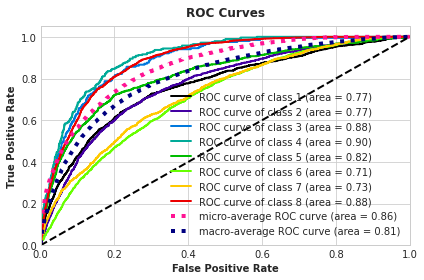

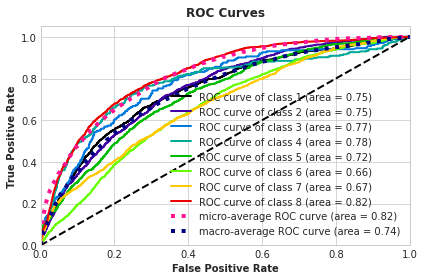

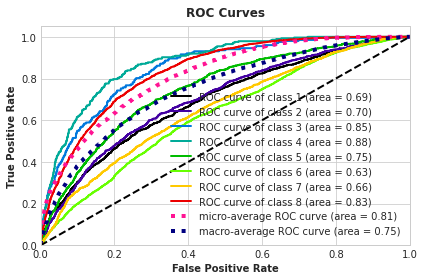

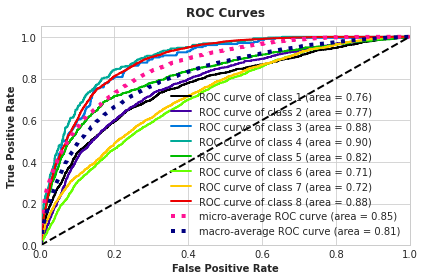

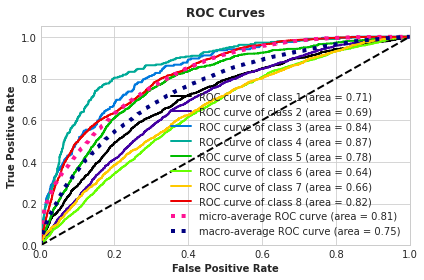

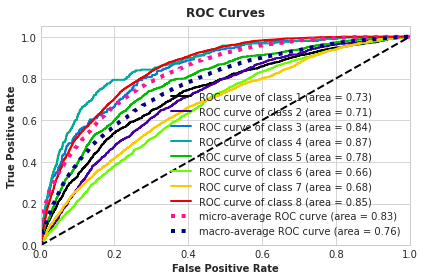

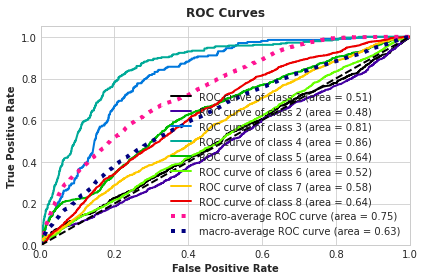

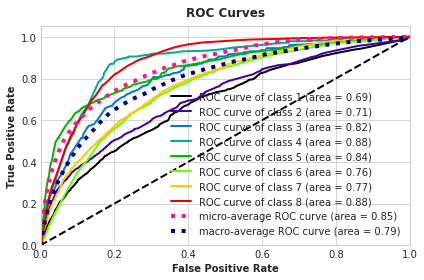

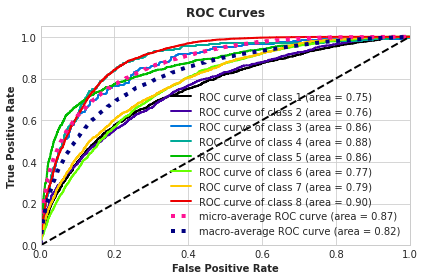

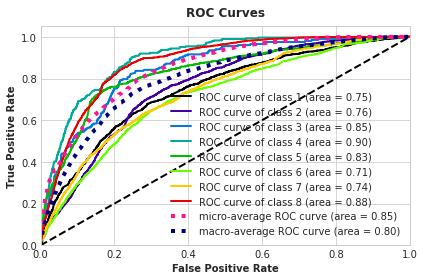

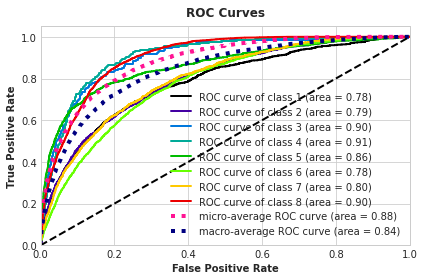

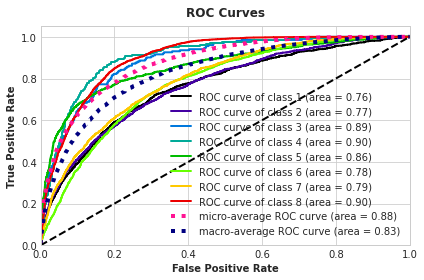

In [65]:
# For each model, plot an Receiver Operating Characteristic (ROC) curve to display model performance - TP rate vs FP rate.

for y_valid_predprobs in Valid_PredProbs:
    plot_roc(y_valid, y_valid_predprobs)

> As shown in the charts above, each model has a wide range of AUC values against each class, indicating a varying degree of sensitivity/specificity across the dataset. The two highest average AUC values were achieved by the gradient boosting classifiers (model **11**: macro-average AUC=0.84, and model **12**: macro-average AUC=0.83).
>
> It is also worth noting that both of these models performed best when predicting applicants for classes 3/4/8, as indicated by the high AUC scores (~0.9) for their respective ROC curves, whereas they perform slightly worse when classifying applicants into the remaining groups.

### Classification Reports (Precisions/Recalls/F1-Scores)

In [66]:
# For each model, print a Classification Report to display model performance - Precision/Recall/F1-score/Accuracy.

for y_valid_preds in Valid_Preds:
    print(classification_report(y_valid, y_valid_preds))

              precision    recall  f1-score   support

           1       0.40      0.28      0.33      1242
           2       0.35      0.19      0.24      1310
           3       0.50      0.06      0.11       202
           4       0.49      0.07      0.12       286
           5       0.42      0.44      0.43      1087
           6       0.37      0.40      0.39      2246
           7       0.43      0.22      0.29      1605
           8       0.59      0.89      0.71      3898

    accuracy                           0.49     11876
   macro avg       0.44      0.32      0.33     11876
weighted avg       0.46      0.49      0.45     11876

              precision    recall  f1-score   support

           1       0.31      0.29      0.30      1242
           2       0.32      0.18      0.23      1310
           3       0.27      0.06      0.10       202
           4       0.00      0.00      0.00       286
           5       0.50      0.10      0.16      1087
           6       0.29 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> As shown in the summary tables above, each model has a wide range of precision/recall values against each class, indicating a varying degree of accuracy across the dataset.
>
> In terms of precision, each of the models display somewhat mediocre performance for each class, with the highest value consistently belonging to class 8. Each model also consistently shows very high recall for class 8, and poorer values against the other groups. The same trend can also be observed for F1-score, indicating that the models are strongly fitted towards predicting applicants in class 8 as we would expect (given that they represent the largest class in our dataset).
> 
> It is interesting to observe that, for class 3, model **11**'s precision/recall/F1-score values are equal to 0, which means that it did not correctly predict any applicants for this risk rating. On the other hand, model **12** showed a precision of 0.27, a recall of 0.05 and an F1-score of 0.08. However, as will be discussed further in the next section, this does not necessarily mean that model 11 is wholly inaccurate and should not be trusted altogether.
>
> Finally, it is important not to judge the models too severely based on their precision/recall/F1-scores alone. These are typically harsh metrics that can indicate where models are strongly under/overfitting as they evaluate accuracy in a "one vs. rest" fashion - if the set of possible `Response` values was much smaller instead, e.g. by grouping together classes 1-8 into Low/Med/High-risk, then each model's performance would appear to significantly improve.

### Confusion Matrices

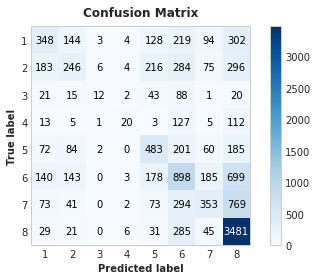

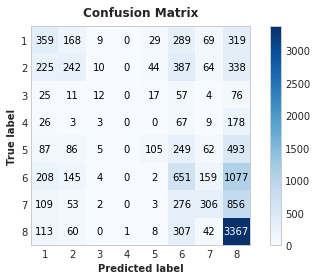

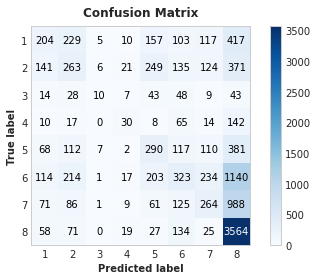

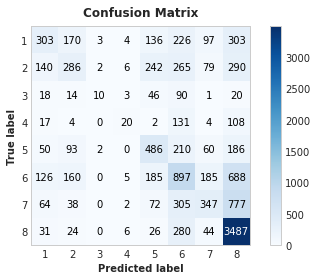

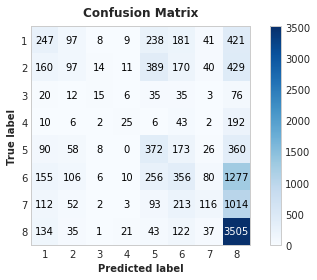

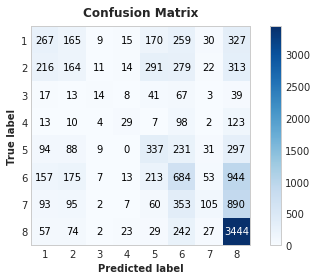

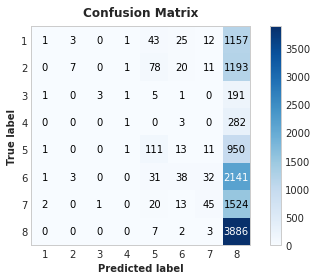

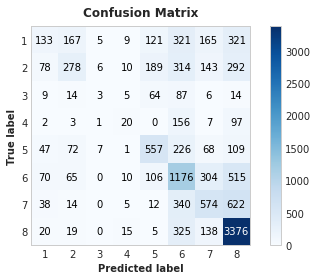

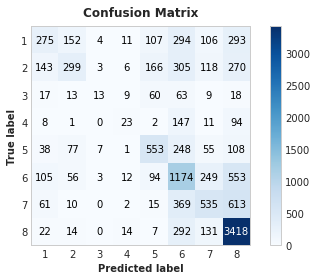

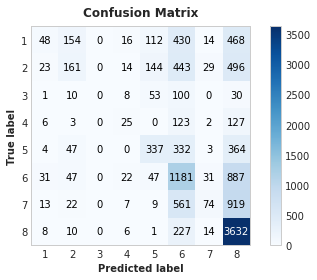

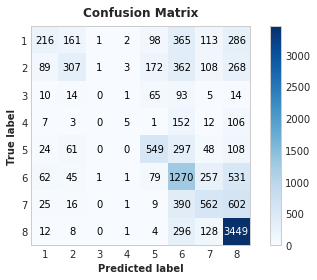

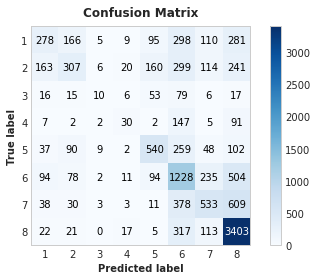

In [67]:
# For each model, plot a Confusion Matrix to display model performance - True labels vs False labels.

for y_valid_preds in Valid_Preds:
    plot_confusion_matrix(y_valid, y_valid_preds)

> The confusion matrices above have been assembled in order to visualise how each model's predictions map to the true set of labels available in the test dataset. These plots help to illustrate as to whether the model has become overfitted to any particular classes in the dataset, or whether they remain sufficiently generalised and capable of sensibly classifying applicants.
>
> From the plots above, most appear to be fairly well-fitted to the data, in that they are capable of replicating the distribution of `Response` values (shown earlier above in Step 1) reasonably well. We can also see that a majority of the missed cases are in fact relatively close to where they should be (e.g. predicted as class 8, was actually class 7). However, there are some notably underperforming models which appear to be highly overfitted towards predicting applicants as belonging to class 8 (which represents the largest proportion across all applicants in the dataset). The confusion matrix for model **7** (SVC with sigmoid kernel) demonstrates this trait extremely well, which shows that only a tiny proportion of predictions were made in any other class apart from 8. Models **3** and **5** (SVCs with linear and polynomial kernels, respectively) also demonstrate this trend to a lesser extent as well.
> 
> Models **11** and **12**, on the other hand, appear to generalise reasonably well to the dataset, mimicking the distribution plot shown in Step 1. Furthermore, the only notable drawback of these models that can be observed is that they tend to predict some low-risk applicants (e.g. classes 1-2) as high-risk applicants (e.g. classes 6-8) with a higher than expected frequency - see the top-right corners of each plot. In terms of using either of these models in a real-world business scenario, this would only mean that more effort/time is potentially wasted on scrutinising low-risk applicants further before offering a policy, rather than treating high-risk applicants with a light touch and introducing unnecessary risk into the insurer's portfolio.

### Balanced Accuracy Scores

> Here, we calculate the balanced accuracy score of each model, by comparing their predictions against the known set of results in the validation dataset. This can be derived as the arithmetic mean of the recalls of each class.
>
> It is important to note that, following similar logic to what has already been mentioned above, this metric is also harsh in that it categorises the predictions in a 'one-vs-rest' fashion - this does not adequately reflect the level of difficulty in correctly classifying each applicant with the exact rating they were given in the validation dataset.
>
> We can derive the balanced accuracy scores of each model as follows:

In [68]:
BalancedAccScores = []

# Calculate the balanced accuracy score for each model's set of predictions.
for y_valid_preds in Valid_Preds:
    BalancedAccScore = balanced_accuracy_score(y_valid, y_valid_preds)
    BalancedAccScores.append(BalancedAccScore)
    
# Collect all Balanced Accuracy scores in a single dictionary.    
BalancedAccScoreResults_y_valid = {'Model1_Calibrated': BalancedAccScores[0],
                                   'Model2_Calibrated': BalancedAccScores[1],
                                   'Model3_Calibrated': BalancedAccScores[2],
                                   'Model4_Calibrated': BalancedAccScores[3],
                                   'Model5_Calibrated': BalancedAccScores[4],
                                   'Model6_Calibrated': BalancedAccScores[5],
                                   'Model7_Calibrated': BalancedAccScores[6],
                                   'Model8_Calibrated': BalancedAccScores[7],
                                   'Model9_Calibrated': BalancedAccScores[8],
                                   'Model10_Calibrated': BalancedAccScores[9],
                                   'Model11_Calibrated': BalancedAccScores[10],
                                   'Model12_Calibrated': BalancedAccScores[11]}

# Select the model with the highest Balanced Accuracy.
Model_LowestBalancedAccScore_Valid = max(BalancedAccScoreResults_y_valid, key=BalancedAccScoreResults_y_valid.get)
print(Model_LowestBalancedAccScore_Valid)

Model12_Calibrated


# Step 13: Assess & determine the best performing model, based on the metrics discussed above

> In the section above, we considered a variety of performance-based factors that are commonly involved in choosing the best model to use for generating a final set of predictions.
>
> Based on the discussions above RE: ROC Curve/Confusion Matrix/Balanced Accuracy Score analyses, we select Model 12 (`XGBClassifier`) as the best performing model to be used for testing purposes.

In [69]:
# Designate model 12 (XGBClassifier) as the best performing model of the cohort.
BestModel = Model12_Calibrated

# Step 14: Generate predictions/probability estimates using the best model (using test data)

> Using the best performing model as determined above, we can now generate a set of test predictions which will be used to evaluate/review the model's performance on unseen data.

In [70]:
# Use the best performing model to generate predictions (as probability estimates) on the test dataset.
BestModel_Test_PredProb = BestModel.predict_proba(X_test_L1reg)

## Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
BestModel_Test_Preds = np.argmax(BestModel_Test_PredProb, axis=1)
BestModel_Test_Classes = BestModel.classes_
BestModel_Test_Preds = [BestModel_Test_Classes[i] for i in BestModel_Test_Preds]
BestModel_Test_Preds = le.inverse_transform(BestModel_Test_Preds)

# Step 15: Evaluate the performance of the final model (using test data)

> In the section below, we will review how the selected model has performed in terms of classifying applicants into each Response group, based on the test dataset.

In [71]:
# Convert the test dataset's encoded labels (0-7) back to the original set of classes (1-8), for clearer reviews of model performance.
y_test = le.inverse_transform(y_test)

# Create a duplicate copy of the model's predicted labels.
Test_Preds = BestModel_Test_Preds

# Create a duplicate copy of the model's prediction probabilities.
Test_PredProbs = BestModel_Test_PredProb

### ROC Curve

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

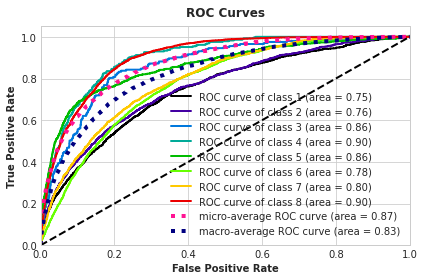

In [72]:
# Plot the ROC curve to display the selected model's performance - TP rate vs FP rate.
plot_roc(y_test, Test_PredProbs)

> As shown in the chart above, the `XGBClassifier` model features a similarly broad range of AUC values against each class, indicating a varying degree of sensitivity/specificity across the dataset. Furthermore, the model has also performed relatively strongly when predicting applicants for classes 3/4/8, as indicated by the high AUC scores (~0.9) for their respective ROC curves - this is a good sign that our model is still able to generalise well, even when handling previously unseen data.

### Classification Report (i.e. Precision/Recall/F1-Score)

In [73]:
# Print a Classification Report to display the selected model's performance - Precision/Recall/F1-score/Accuracy.

print(classification_report(y_test, Test_Preds))

              precision    recall  f1-score   support

           1       0.41      0.19      0.26      1241
           2       0.43      0.24      0.31      1310
           3       0.25      0.05      0.09       203
           4       0.31      0.10      0.15       286
           5       0.54      0.49      0.51      1086
           6       0.40      0.53      0.46      2247
           7       0.44      0.33      0.38      1606
           8       0.65      0.88      0.74      3898

    accuracy                           0.53     11877
   macro avg       0.43      0.35      0.36     11877
weighted avg       0.50      0.53      0.49     11877



> As shown in the classification report above, the model shows a broad range of precision/recall/F1-score values against each class, indicating a varying degree of accuracy across the dataset and emphasising how the model has been generally well-fitted towards the most important `Response` groups. The model still appears to perform best when predicting for class 8 applicants, as evidenced by the relatively higher precision/recall/F1-score values for this group.

### Confusion Matrix

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

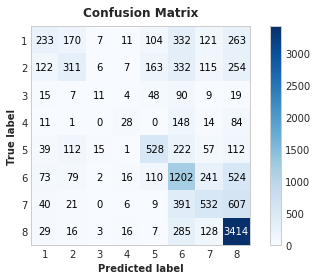

In [74]:
# Plot a Confusion Matrix to display the selected model's performance - True labels vs False labels.

plot_confusion_matrix(y_test, Test_Preds)

> From the confusion matrix above, it is clear that the model has performed on the test dataset very similarly to the validation scenario discussed earlier above. Furthermore, the model has also been relatively successful in replicating the `Response` distribution shown earlier in Step 1, 
>
> Any off-diagonal hotspots (representing notable proportions of incorrect predictions) have already been revealed as part of the model validation process earlier above - so this should not come as a huge surprise. The important thing to note is that, with the exception of the observations in the top-right corner (where the model has predicted higher risk levels than required), the model appears to be well-fitted towards handling a multitude of applicants with varying levels of risk.

### Balanced Accuracy Score

> Finally, we can calculate the balanced accuracy score of the selected model, using the test dataset:

In [75]:
# Calculate the balanced accuracy score for the selected model.
BalancedAccScore_y_test = balanced_accuracy_score(y_test, Test_Preds)

print(BalancedAccScore_y_test)

0.3506825677826708


# Step 16: Review model performance in the context of "feature importance" and explainability

> In the section above, we considered how well the model has performed against a number of key metrics such as ROC-AUC scores and precisions/recalls. However, we also need to think about how the model's decisions/behaviour can be explained in a clear and consistent manner - this is important in a real-world scenario from both a legal and ethical perspective, as we are assessing the prospective risk levels of numerous applicants for life insurance policies. Agreeing/rejecting applicants on insufficient/incorrect grounds could otherwise lead to reputational/financial damages.
>
> In this section, we will now consider:
> * what features have the biggest impact on the `XGBClassifier` model's predictions, and
> * how the `XGBClassifier` model has generated its predictions based on the values of the most important features.

### Feature Importances

> Firstly, we will take a look at the `XGBClassifier` a bit more closely, in order to understand what features the model values most highly.

In [76]:
# Review the feature importances of the XGBoost classifier.

FeatureImportances_BestModel = BestModel.base_estimator.feature_importances_
FeatureImportances_BestModel

array([0.02911371, 0.0044601 , 0.01112732, 0.04354944, 0.01487462,
       0.00404294, 0.00493405, 0.01689958, 0.02844257, 0.01391652,
       0.00789393, 0.01873194, 0.00435109, 0.00500758, 0.00374103,
       0.00952911, 0.0109926 , 0.00478849, 0.10871722, 0.0081367 ,
       0.01023403, 0.01178433, 0.00423241, 0.00493477, 0.00665596,
       0.01458347, 0.0079069 , 0.19185317, 0.00428477, 0.01151217,
       0.01455387, 0.0058812 , 0.02953277, 0.00710458, 0.01115595,
       0.00349253, 0.00878142, 0.03052716, 0.00384796, 0.0848112 ,
       0.0681682 , 0.00976131, 0.00569562, 0.0052988 , 0.00455548,
       0.01133545, 0.00511969, 0.01293758, 0.00735912, 0.0040342 ,
       0.01026647, 0.00665786, 0.00568481, 0.00905875, 0.00360809,
       0.00371149, 0.00582594], dtype=float32)

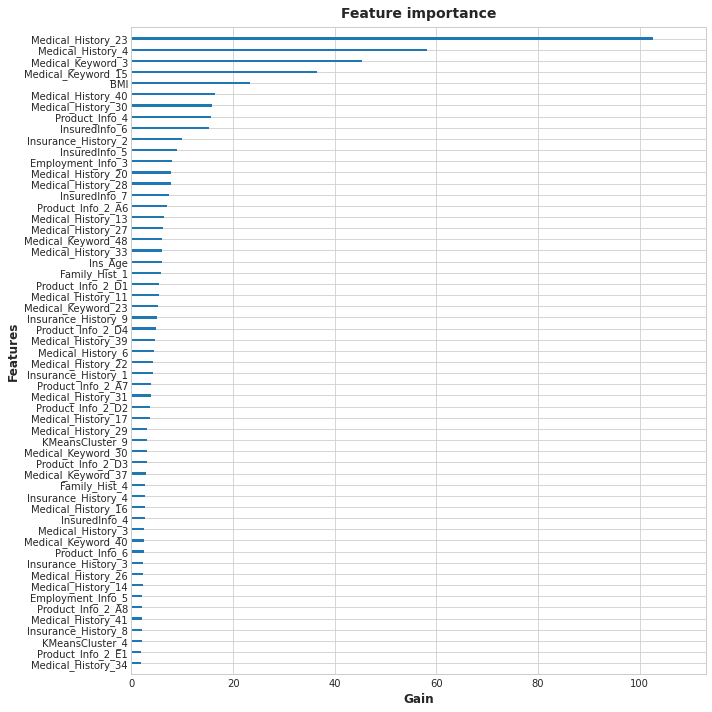

In [77]:
from xgboost import plot_importance

# Generate a Feature Importance plot using the selected model.

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(BestModel.base_estimator,
                importance_type="gain",
                xlabel="Gain",
                show_values=False,
                ax=ax)
plt.show()

> The Gain chart above demonstrates the relative contribution of each feature to the model - which is calculated by taking each feature's contribution for each decision tree that is used in the model.
>
> This plot shows that the top five most important features (in terms of Gain/model contribution) are:
>* `Medical_History_23`, 
>* `Medical_History_4`, 
>* `Medical_Keyword_3`, 
>* `Medical_Keyword_15`, and
>* `BMI`.
>
> Interestingly, these five features were also highly ranked within the Mutual Information score chart (see Step 7 earlier above), which lends some credibility to the view that these features may be closely involved in governing what risk rating an applicant should be assigned. 
>
> The bottom five (i.e. least important) features in terms of Gain are:
>* `Medical_History_34`,
>* `Product_Info_2_E1`,
>* `KMeansCluster_4`,
>* `Insurance_History_8`, and
>* `Medical_History_41`.
>
> Four of these five features were also poorly ranked within the MI score chart shown in Step 7, however `KMeansCluster_4` was instead moderately ranked (residing within the top 15 features). This implies that, whilst `KMeansCluster_4` was initially deemed to show some potential in terms of predictive power, the `XGBClassifier` does not value this feature as highly when generating predictions for the test dataset.

### Permutation Importance

> Next, we can review how the model handles random column-wise reordering of data - performing what is more commonly known as permutation importance analysis - to see which features increase the volatility of our model's predictions upon random shuffling (and hence, which features the model relies on most heavily for generating predictions).
>
> To do this, we will calculate the permutation importance weights using our test dataset, as shown below:

In [78]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

# Calculate the Permutation Importances of the selected model.

perm = PermutationImportance(BestModel.base_estimator, random_state=0).fit(X_test_L1reg, y_test)

In [79]:
# Show the Permutation Importance weights (plus errors) of the top 20 features.

show_weights(perm, feature_names=X_test_L1reg.columns.tolist())

> The values towards the top of the table are the most important, and those towards the bottom matter the least.
>
> Here, the top five features that appear to have the strongest impact on the model's performance/accuracy when shuffled randomly are:
>* `Medical_Keyword_3`
>* `Medical_History_39`
>* `InsuredInfo_5`
>* `Product_Info_2_D1`
>* `Medical_History_17`
>
> Most of these features were also highlighted as having the highest feature importances in the section above. Interestingly, `Medical_History_23` (the highest scored feature in terms of Feature Importance) does not show up in the top 20 permutation importance weightings - this could imply that this feature does not have any meaningful causational relationship with `Response`, and has unintentionally been given higher importance due to possible overfitting.
>
> More information on the topic of comparing tree-based feature importances against permutation importances can be found at the following page: [Relation to impurity-based importance in trees - scikit-learn](https://scikit-learn.org/stable/modules/permutation_importance.html#relation-to-impurity-based-importance-in-trees).

### SHAP Values

> The `SHAP` framework (acronym derived from **SH**apley **A**dditive ex**P**lanations) is excellent for breaking down predictions in order to show the impact of each feature. This is especially useful for when we want to explain how/why we have classified certain applicants who may have demonstrated high/low risk potential.
>
> The advantage that this approach has over calculating permutation importances alone, is that `SHAP` values can express whether a feature has a broad effect across all predictions, or whether its effect is more localised for a handful of predictions and negligible in general; permutation importance simply captures the "average" impact of each feature.
>
> Here, we will calculate the SHAP values for the test dataset to visualise how the `XGBClassifier` model has behaved, based on the values of the most important features.

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


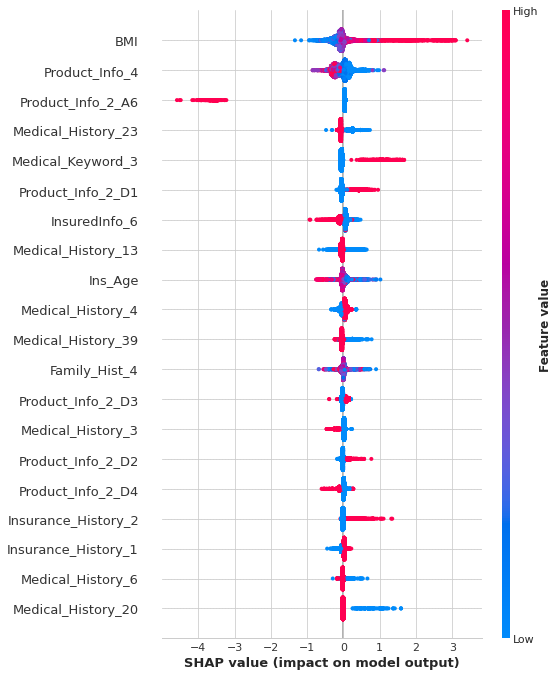

In [80]:
import shap

# Initialise the explainer object in order to calculate SHAP values.
explainer = shap.TreeExplainer(BestModel.base_estimator)

# Calculate SHAP values for the whole test dataset.
shap_values = explainer.shap_values(X_test_L1reg)

# Create a summary plot of the SHAP values.
shap.summary_plot(shap_values[1], X_test_L1reg)

> The SHAP summary plot above provides us with a top-down view of feature importance, for the top 20 features as calculated via the `SHAP` framework. The colour of each dot represents whether that feature was high or low (for that row in the dataset), and its horizontal location shows whether the effect of that value caused a higher (towards 8) or lower (towards 1) prediction.
>
> For instance, the `BMI` feature clearly expresses that as the BMI of the applicant increases, then their predicted risk rating also increases strongly. As another example, `Product_Info_2_A6` - i.e. whether the applicant's selection for `Product_Info_2` is equal to **A6** - shows a clear negative correlation with the predicted risk rating.
>
> However, there are also a couple of other interesting cases to note - for example, `Ins_Age` shows a negative correlation when away from the baseline value (class 5) but is more mixed as the value approaches the baseline. `Family_Hist_4` appears to show a mixed effect on the value of `Response` regardless of the choice of class.

### SHAP Dependence Plots

> We can also review individual features more closely, by creating SHAP dependence contribution plots.
>
> These are extremely helpful for displaying what the distribution of effects is, and linking this to a model's predictions.

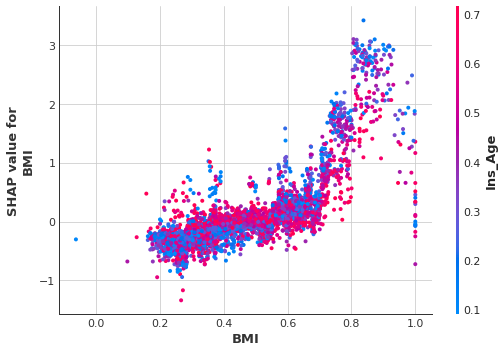

In [81]:
# Create a SHAP Dependence plot of the highest ranked feature - "BMI".

shap.dependence_plot("rank(0)", shap_values[1], X_test_L1reg)

> Here, we have generated a SHAP dependence contribution plot for `BMI` as a function of `Ins_Age`. The horizontal location of each dot represents the actual value from the test dataset, and the vertical location represents the impact (on the prediction) of having that value.
>
> The shape of the plot indicates that, once `BMI` exceeds 0.7, the distribution slopes sharply upwards - inferring that the likelihood of being assigned to a higher risk rating greatly increases after this point. However, as `BMI` approaches 1.0, the distribution then quickly slopes downwards. The drastic increase in the distribution's spread as the feature value approaches 1.0 implies that other features begin to interact more strongly with `BMI` at this upper limit.
>
> Upon reviewing the interaction between `BMI` and `Ins_Age` more closely at this upper limit, it appears that on average, younger applicants with high BMIs tend to be assigned higher risk ratings by the model than high-BMI applicants that are more elderly, however more data would be required in order to validate this hypothesis, before any relevant business decisions could be made. 

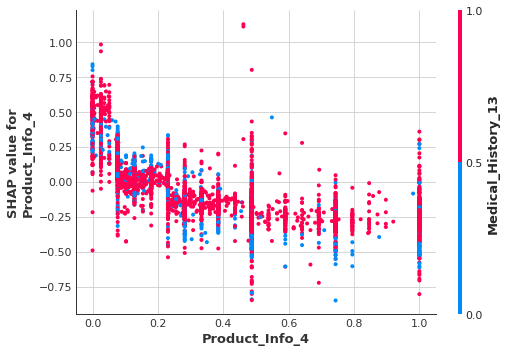

In [82]:
# Create a SHAP Dependence plot of the 2nd highest ranked feature - "Product_Info_4".

shap.dependence_plot("rank(1)", shap_values[1], X_test_L1reg)

> The shape of this plot indicates a broad range of interaction between `Product_Info_4` and `Response` within the test dataset. However, the general trend is that at low values of `Product_Info_4`, the likelihood of being assigned to a higher risk rating is increased - however a couple of notable exceptions to this are when the distribution's spread is at its widest, where `Product_Info_4` is close to either 0.0, 0.5 or 1.0.
>
> The interaction between `Product_Info_4` and `Medical_History_13` seems to vary quite significantly - however a notable trend that can be observed is that, for a given value of `Product_Info_4`, applicants with lower values of `Medical_History_13` tend to be rated as less risky than their counterparts with higher values of `Medical_History_13`. This trend is especially notable when `Product_Info_4` approaches either 0.0, 0.5 or 1.0.

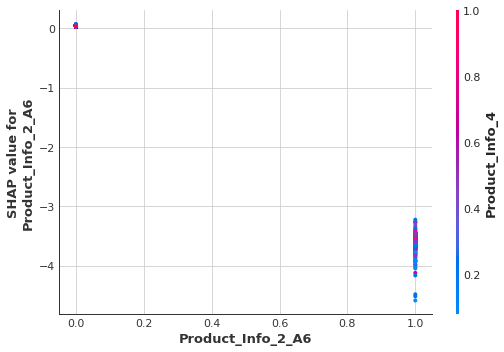

In [83]:
# Create a SHAP Dependence plot of the 3rd highest ranked feature - "Product_Info_2_A6".

shap.dependence_plot("rank(2)", shap_values[1], X_test_L1reg)

> This plot displays that, when the applicant's selection for `Product_Info_2` is equal to **A6**, the predicted risk rating is generally much lower on average (as already mentioned in the summary plot), whereas if it is not equal to **A6** then the risk rating is extremely likely to stay at the baseline (class 5).
>
> Although it is difficult to spot visually, `Product_Info_2_A6` does also show some interaction with `Medical_Keyword_3`. In cases where `Product_Info_2_A6` feature is equal to 1.0, applicants with lower values of `Medical_Keyword_3` tend to shift the model's predictions away from class 1, and slightly closer towards class 2.

# Step 17: Review for areas of improvement

> Whilst this project has aimed to showcase an implementation of the DS/ML workflow in an insurance-based context, it does not aim to provide a comprehensive "A-Z" approach on how to apply ML techniques for the risk classification of insurance applicants. There are, however, a couple of areas where this project could be improved.
>
> For example, in terms of **model performance**:
> * The aim of this project has been to establish an ML model that is capable of accurately predicting risk ratings (split between 8 different categories) for insurance applicants. However, as this involves working with a fairly complex dataset with a wide range of features, the model has not been fully able to capture every single nuance within the dataset, and has instead generalised to predict across the entire distribution to a reasonable degree of accuracy. Therefore, the model may actually prove to be more useful for business purposes if it was instead assigned to predict based on broader sets of risk bandings (e.g. classes 1-3 could be grouped together into Low, classes 4-6 into Medium, and classes 7-9 into High). Then, further refinement of these initial groupings could be made by assembling another layer of classifiers that are specifically trained on datasets that are representative of each risk banding (e.g. another model specifically trained for performing further segmentation of low-risk applicants).
>
> In terms of **feature engineering**:
> * As this dataset's feature names have been anonymised, it has not been possible to incorporate "business logic"-driven feature engineering directly into the model preparation process. However, potential interactions between features could still be studied further during EDA in order to produce new features that take advantage of statistical correlations within the dataset. With the assistance of an "unanonymised" dataset as well as the input of subject matter expertise, it may be possible to create more predictive features and validate them for use in production.
>
> Lastly, in terms of **feature selection**:
> * More stringent and quantitative-based approaches could have been used, in order to combine the methods employed for selecting the list of features that would be supplied to each model during the training process. For clarity, whilst we used Mutual Information/Variance Inflation Factor/Principal Component analysis techniques to display how the importance of each feature varied throughout the dataset, we only relied on Lasso regularisation in order to produce the final cut of selected features. It may be worth considering the use of a "voting system" in order to select features based on how they are ranked across each of the techniques used, so that one technique alone does not provide a final view.

# Acknowledgements

> In addition to the sources cited earlier above, I would also like to thank **Prudential** for publishing the life insurance applicant dataset that was considered in this project.
> 
> Additional information regarding the dataset that was used throughout this project, as well as the affiliated 2016 competition "**Prudential Life Insurance Assessment**" hosted on Kaggle, can be found [here](https://www.kaggle.com/competitions/prudential-life-insurance-assessment/).